# Problem Statement:
In the real estate industry, determining the appropriate rental price for a property is crucial for property owners, tenants, and property management companies. Accurate rent predictions can help landlords set competitive prices, tenants make informed rental decisions, and property management companies optimize their portfolio management.

# Goal:
The goal of this project is to develop a data-driven model that predicts the rental price of residential properties based on relevant features. By analyzing historical rental data and property attributes, the model aims to provide accurate and reliable rent predictions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
# Setting option to display all the columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Loading the Training Dataset
df_train = pd.read_excel("House_Rent_Train.xlsx")

In [4]:
# Displying the top 5 rows of the training dataset
df_train.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [5]:
# To see what is the shape of the training dataset

print("No of Rows :", df_train.shape[0])
print("No of Columns:", df_train.shape[1])

No of Rows : 20555
No of Columns: 25


# Calculating the missing percentage of values for the training dataset

In [6]:
missing_values = df_train.isnull().sum()
missing_percentages = (missing_values / len(df_train)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

# Display the missing values and percentages
print(missing_info)

                 Missing Values  Percentage
id                            0    0.000000
type                         27    0.131355
locality                    160    0.778399
activation_date              23    0.111895
latitude                     23    0.111895
longitude                    23    0.111895
lease_type                   23    0.111895
gym                           0    0.000000
lift                          0    0.000000
swimming_pool                 0    0.000000
negotiable                    0    0.000000
furnishing                    0    0.000000
parking                       0    0.000000
property_size                 0    0.000000
property_age                 23    0.111895
bathroom                     23    0.111895
facing                       23    0.111895
cup_board                    23    0.111895
floor                        23    0.111895
total_floor                  23    0.111895
amenities                    23    0.111895
water_supply                 23 

## Observation:
With a total of 20,555 rows in the dataset, the presence of only 160 rows with missing values suggests that the percentage of missing data is relatively small. In such cases, opting to drop these rows can be considered a reasonable approach during data preprocessing. The impact of removing a small percentage of rows is likely to be minimal and may not significantly affect the overall patterns or trends in the dataset.

In [7]:
# Drop rows with missing values
df_train = df_train.dropna()

# Display the shape of the cleaned DataFrame
print("No of Rows after cleaning:", df_train.shape[0])
print("No of Columns after cleaning:", df_train.shape[1])

No of Rows after cleaning: 20377
No of Columns after cleaning: 25


# Handling Duplicates in the traing and testing data

In [8]:
# Check for duplicates for training dataset 
duplicate_rows = df_train[df_train.duplicated()]

In [9]:
# to see how many duplicated rows are present in the training dataset 
print("No of Rows :", duplicate_rows.shape[0])
print("No of Columns:", duplicate_rows.shape[1])

No of Rows : 20
No of Columns: 25


In [10]:
# Remove duplicates (keeping the first occurrence)
df_train = df_train.drop_duplicates()

In [11]:
# Display the shape of the cleaned DataFrame
print("No of Rows after cleaning:", df_train.shape[0])
print("No of Columns after cleaning:", df_train.shape[1])

No of Rows after cleaning: 20357
No of Columns after cleaning: 25


## Observation
- For training dataset 20 rows found to be duplicated and are removed

# Droping the ID column since it is a unique identifier for each propertyu

In [12]:
# Drop the 'id' column
df_train = df_train.drop('id', axis=1)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20357 entries, 1 to 20499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             20357 non-null  object 
 1   locality         20357 non-null  object 
 2   activation_date  20357 non-null  object 
 3   latitude         20357 non-null  float64
 4   longitude        20357 non-null  float64
 5   lease_type       20357 non-null  object 
 6   gym              20357 non-null  int64  
 7   lift             20357 non-null  int64  
 8   swimming_pool    20357 non-null  int64  
 9   negotiable       20357 non-null  int64  
 10  furnishing       20357 non-null  object 
 11  parking          20357 non-null  object 
 12  property_size    20357 non-null  int64  
 13  property_age     20357 non-null  float64
 14  bathroom         20357 non-null  float64
 15  facing           20357 non-null  object 
 16  cup_board        20357 non-null  float64
 17  floor       

In [14]:
df_train.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
5,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0


# Data Preprocessing

In [15]:
df_train.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

# Handlying Type column 

In [16]:
df_train['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

## Observation :
- same values are found in upper and lower case need to handle it 

In [17]:
# Correct 'type' column values
df_train['type'] = df_train['type'].str.upper()

# Display the unique values in the 'type' column after correction
print(df_train['type'].unique())

['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS' '1BHK1']


In [18]:
df_train['type'] = df_train['type'].replace('1BHK1', 'BHK1')

In [19]:
df_train['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

In [20]:
df_train['activation_date'].unique()

array([datetime.datetime(2017, 9, 10, 12, 48),
       datetime.datetime(2018, 12, 6, 22, 2), '20-07-2018 16:22', ...,
       '21-12-2017 21:18', '28-06-2018 21:58',
       datetime.datetime(2018, 8, 7, 22, 31)], dtype=object)

In [21]:
df_train['activation_date'] = pd.to_datetime(df_train['activation_date'], errors='coerce')

# Extract only the date portion
df_train['activation_date'] = df_train['activation_date'].dt.date


In [22]:
df_train['activation_date'].unique()

array([datetime.date(2017, 9, 10), datetime.date(2018, 12, 6),
       datetime.date(2018, 7, 20), datetime.date(2018, 5, 31),
       datetime.date(2017, 10, 24), datetime.date(2018, 12, 7),
       datetime.date(2018, 7, 30), datetime.date(2018, 3, 26),
       datetime.date(2018, 10, 3), datetime.date(2017, 11, 7),
       datetime.date(2017, 5, 11), datetime.date(2017, 8, 27),
       datetime.date(2018, 5, 7), datetime.date(2018, 11, 3),
       datetime.date(2018, 7, 15), datetime.date(2017, 8, 14),
       datetime.date(2017, 12, 15), datetime.date(2018, 8, 6),
       datetime.date(2017, 9, 8), datetime.date(2018, 6, 19),
       datetime.date(2018, 2, 7), datetime.date(2018, 5, 17),
       datetime.date(2018, 5, 28), datetime.date(2018, 8, 5),
       datetime.date(2018, 4, 28), datetime.date(2017, 9, 24),
       datetime.date(2017, 7, 13), datetime.date(2018, 6, 24),
       datetime.date(2018, 5, 25), datetime.date(2018, 4, 24),
       datetime.date(2017, 7, 16), datetime.date(2018, 6, 

In [23]:
df_train['latitude'].unique()

array([12.92955671, 12.98287026, 12.95599061, ..., 12.90180016,
       12.965502  , 12.998645  ])

In [24]:
df_train['longitude'].unique()

array([77.6722797 , 80.26201214, 77.53163369, ..., 77.56659698,
       77.647694  , 77.57433582])

In [25]:
df_train['lease_type'].unique()

array(['ANYONE', 'FAMILY', 'BACHELOR', 'COMPANY'], dtype=object)

In [26]:
df_train['gym'].unique()

array([0, 1], dtype=int64)

In [27]:
df_train['lift'].unique()

array([1, 0], dtype=int64)

In [28]:
df_train['swimming_pool'].unique()

array([0, 1], dtype=int64)

In [29]:
df_train['negotiable'].unique()

array([1, 0], dtype=int64)

In [30]:
df_train['furnishing'].unique()

array(['SEMI_FURNISHED', 'FULLY_FURNISHED', 'NOT_FURNISHED'], dtype=object)

In [31]:
df_train['facing'].unique()

array(['NE', 'E', 'S', 'N', 'SE', 'W', 'NW', 'SW'], dtype=object)

In [32]:
df_train['water_supply'].unique()

array(['CORPORATION', 'CORP_BORE', 'BOREWELL'], dtype=object)

In [33]:
df_train['building_type'].unique()

array(['AP', 'IH', 'IF', 'GC'], dtype=object)

In [34]:
df_train['parking'].unique()

array(['BOTH', 'TWO_WHEELER', 'NONE', 'FOUR_WHEELER'], dtype=object)

#  Extracting and Analyzing Amenities Data

# Observation:
The "Amenities" column contains a list of amenities present in each property. Extracting these features is crucial for analyzing how they influence the rental price of a property. Understanding the specific amenities provided can offer valuable insights into the factors that contribute to variations in rent across different properties.



In [35]:
df_train.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [36]:
from pandas import json_normalize

# Parse the 'amenities' column as JSON, skipping invalid JSON or NaN values
df_train['amenities'] = df_train['amenities'].apply(lambda x: json.loads(str(x).replace("'", "\"")) if pd.notnull(x) else {})

# Normalize the 'amenities' column
amenities_df = json_normalize(df_train['amenities'])

In [37]:
amenities_df.head()

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,True,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,True
1,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,True,True,False,False,True,False,True,True,True,False,True,False,False,False,False,False,False,True,False


In [38]:
# Display unique values, counts, and count of NaN for each column in amenities_df
for column in amenities_df.columns:
    unique_counts = amenities_df[column].value_counts()
    nan_count = amenities_df[column].isna().sum()
    print(f"Column: {column}\nUnique Values:\n{unique_counts}\nNaN Count: {nan_count}\n")

Column: LIFT
Unique Values:
False    12389
True      7968
Name: LIFT, dtype: int64
NaN Count: 0

Column: GYM
Unique Values:
False    15316
True      4980
Name: GYM, dtype: int64
NaN Count: 61

Column: INTERNET
Unique Values:
True     13472
False     6885
Name: INTERNET, dtype: int64
NaN Count: 0

Column: AC
Unique Values:
False    19492
True       865
Name: AC, dtype: int64
NaN Count: 0

Column: CLUB
Unique Values:
False    15522
True      3780
Name: CLUB, dtype: int64
NaN Count: 1055

Column: INTERCOM
Unique Values:
False    16427
True      3930
Name: INTERCOM, dtype: int64
NaN Count: 0

Column: POOL
Unique Values:
False    16500
True      3857
Name: POOL, dtype: int64
NaN Count: 0

Column: CPA
Unique Values:
False    13362
True      5940
Name: CPA, dtype: int64
NaN Count: 1055

Column: FS
Unique Values:
False    15581
True      4776
Name: FS, dtype: int64
NaN Count: 0

Column: SERVANT
Unique Values:
False    18547
True       755
Name: SERVANT, dtype: int64
NaN Count: 1055

Column: SE

In [39]:
# Replace NaN with False for all columns
amenities_df = amenities_df.fillna(False)

In [40]:
# Display unique values, counts, and count of NaN for each column in amenities_df
for column in amenities_df.columns:
    unique_counts = amenities_df[column].value_counts()
    nan_count = amenities_df[column].isna().sum()
    print(f"Column: {column}\nUnique Values:\n{unique_counts}\nNaN Count: {nan_count}\n")

Column: LIFT
Unique Values:
False    12389
True      7968
Name: LIFT, dtype: int64
NaN Count: 0

Column: GYM
Unique Values:
False    15377
True      4980
Name: GYM, dtype: int64
NaN Count: 0

Column: INTERNET
Unique Values:
True     13472
False     6885
Name: INTERNET, dtype: int64
NaN Count: 0

Column: AC
Unique Values:
False    19492
True       865
Name: AC, dtype: int64
NaN Count: 0

Column: CLUB
Unique Values:
False    16577
True      3780
Name: CLUB, dtype: int64
NaN Count: 0

Column: INTERCOM
Unique Values:
False    16427
True      3930
Name: INTERCOM, dtype: int64
NaN Count: 0

Column: POOL
Unique Values:
False    16500
True      3857
Name: POOL, dtype: int64
NaN Count: 0

Column: CPA
Unique Values:
False    14417
True      5940
Name: CPA, dtype: int64
NaN Count: 0

Column: FS
Unique Values:
False    15581
True      4776
Name: FS, dtype: int64
NaN Count: 0

Column: SERVANT
Unique Values:
False    19602
True       755
Name: SERVANT, dtype: int64
NaN Count: 0

Column: SECURITY
Uni

In [41]:
# Replace True with 1 and False with 0 for all columns
amenities_df = amenities_df.applymap(lambda x: 1 if x == True else 0)

In [42]:
amenities_df.head()

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0


In [43]:
amenities_df.shape

(20357, 19)

In [44]:
amenities_df.isnull().sum()

LIFT        0
GYM         0
INTERNET    0
AC          0
CLUB        0
INTERCOM    0
POOL        0
CPA         0
FS          0
SERVANT     0
SECURITY    0
SC          0
GP          0
PARK        0
RWH         0
STP         0
HK          0
PB          0
VP          0
dtype: int64

# Observation : 
- Droping Gym,pool,lift beacause it is already avalilable in our main dataset 
- Droping other features because meaning is  not clear from the provided information.

In [45]:
# Assuming amenities_df is your DataFrame
columns_to_drop = ['SC', 'GP', 'STP', 'PB', 'VP', 'LIFT', 'GYM', 'POOL','CPA','FS','RWH']

# Drop the specified columns
amenities_df = amenities_df.drop(columns=columns_to_drop)

In [46]:
amenities_df.head()

,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HK
0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0


In [47]:
amenities_df.rename(columns={'HK': 'HOUSE_KEEPING'}, inplace=True)

In [48]:
amenities_df.head()

,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING
0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0


In [49]:
amenities_df.shape

(20357, 8)

In [50]:
df_train.shape

(20357, 24)

In [51]:
amenities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20357 entries, 0 to 20356
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   INTERNET       20357 non-null  int64
 1   AC             20357 non-null  int64
 2   CLUB           20357 non-null  int64
 3   INTERCOM       20357 non-null  int64
 4   SERVANT        20357 non-null  int64
 5   SECURITY       20357 non-null  int64
 6   PARK           20357 non-null  int64
 7   HOUSE_KEEPING  20357 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20357 entries, 1 to 20499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             20357 non-null  object 
 1   locality         20357 non-null  object 
 2   activation_date  20357 non-null  object 
 3   latitude         20357 non-null  float64
 4   longitude        20357 non-null  float64
 5   lease_type       20357 non-null  object 
 6   gym              20357 non-null  int64  
 7   lift             20357 non-null  int64  
 8   swimming_pool    20357 non-null  int64  
 9   negotiable       20357 non-null  int64  
 10  furnishing       20357 non-null  object 
 11  parking          20357 non-null  object 
 12  property_size    20357 non-null  int64  
 13  property_age     20357 non-null  float64
 14  bathroom         20357 non-null  float64
 15  facing           20357 non-null  object 
 16  cup_board        20357 non-null  float64
 17  floor       

## Merging the amenities df to the main df

In [53]:
df_train = pd.merge(df_train, amenities_df, left_index=True, right_index=True)


In [54]:
df_train.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
INTERNET           0
AC                 0
CLUB               0
INTERCOM           0
SERVANT            0
SECURITY           0
PARK               0
HOUSE_KEEPING      0
dtype: int64

In [55]:
df_train.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING
1,BHK2,Bellandur,2017-09-10,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{'LIFT': True, 'GYM': False, 'INTERNET': False...",CORPORATION,AP,2.0,22000.0,0,0,0,0,0,0,1,0
2,BHK3,Thiruvanmiyur,2018-12-06,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{'LIFT': True, 'GYM': False, 'INTERNET': False...",CORP_BORE,AP,3.0,28000.0,0,0,0,0,0,0,0,0
3,BHK1,Attiguppe,2018-07-20,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{'LIFT': False, 'GYM': False, 'INTERNET': Fals...",CORPORATION,IH,0.0,8000.0,0,0,0,0,0,0,1,0
4,BHK3,Kodihalli,2018-05-31,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{'LIFT': False, 'GYM': False, 'INTERNET': Fals...",CORPORATION,IH,1.0,45000.0,0,0,1,0,0,1,0,0
5,BHK1,"Seetharampalya,Hoodi",2017-10-24,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,"{'LIFT': True, 'GYM': True, 'INTERNET': False,...",CORP_BORE,AP,2.0,18000.0,1,1,1,1,1,1,1,1


In [56]:
# Drop the 'amenities' column
df_train = df_train.drop('amenities', axis=1)

In [57]:
df_train.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING
1,BHK2,Bellandur,2017-09-10,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,0,0,0,0,0,0,1,0
2,BHK3,Thiruvanmiyur,2018-12-06,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,0,0,0,0,0,0,0,0
3,BHK1,Attiguppe,2018-07-20,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,0,0,0,0,0,0,1,0
4,BHK3,Kodihalli,2018-05-31,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,0,0,1,0,0,1,0,0
5,BHK1,"Seetharampalya,Hoodi",2017-10-24,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,1,1,1,1,1,1,1,1


In [58]:
df_train['locality'].unique()

array(['Bellandur', 'Thiruvanmiyur', 'Attiguppe', ...,
       'Kodihalli, HAL 3rd Stage', 'Bharati Nagar', 'Injambakkam'],
      dtype=object)

In [59]:
df_train.columns

Index(['type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'INTERNET', 'AC', 'CLUB',
       'INTERCOM', 'SERVANT', 'SECURITY', 'PARK', 'HOUSE_KEEPING'],
      dtype='object')

In [60]:
unique_localities = df_train['locality'].unique()

# Print unique values in batches
batch_size = 10  # You can adjust the batch size as needed
for i in range(0, len(unique_localities), batch_size):
    print(unique_localities[i:i+batch_size])

['Bellandur' 'Thiruvanmiyur' 'Attiguppe' 'Kodihalli'
 'Seetharampalya,Hoodi' 'Narayanappa Garden,Whitefield'
 'HSR Layout 5th Sector' 'Banashankari' 'Whitefield' 'RR Nagar']
['ITPL Residential Flats' 'Raja Rajeshwari Nagar'
 'Prestige Shanthinikethan, Bengaluru, Karnataka, India' 'Murugeshpalya'
 'Sheshadripuram' 'Cox Town' 'BTM 2nd Stage' 'Chikkakannalli' 'agara'
 'Doddanekkundi']
['Munnekollal'
 'Hoodi Railway Station, 1, Sadaramangala Road, Kodigehalli, Krishnarajapura, Bengaluru, Karnataka 560036, India'
 'Garudachar Palya,Mahadevapura' 'Bommanahalli' 'Hoodi' 'Mahadevapura'
 'Viveka Nagar' 'Kadubeesanahalli,' 'Sanjeevini Nagar' 'Doddanekundi']
['Indiranagar' 'Brookefield' 'New Tippasandra' 'JP Nagar 1st Phase'
 'Vimanapura' 'Jayanagar' 'Uttarahalli Hobli' 'Kaikondrahalli'
 'Kaggadasapura' 'Adugodi']
['Jayanagar 5th Block' 'Hanumantha Nagar' 'Basaveshwar Nagar'
 'Kasavanahalli' 'Thirumalashettyhally' 'BTM Layout' 'Chikkalasandra'
 'Yelachenahallli, Bengaluru, Karnataka, India' 'Wils

In [61]:
# Drop the 'amenities' column
df_train = df_train.drop('locality', axis=1)

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20225 entries, 1 to 20356
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             20225 non-null  object 
 1   activation_date  20225 non-null  object 
 2   latitude         20225 non-null  float64
 3   longitude        20225 non-null  float64
 4   lease_type       20225 non-null  object 
 5   gym              20225 non-null  int64  
 6   lift             20225 non-null  int64  
 7   swimming_pool    20225 non-null  int64  
 8   negotiable       20225 non-null  int64  
 9   furnishing       20225 non-null  object 
 10  parking          20225 non-null  object 
 11  property_size    20225 non-null  int64  
 12  property_age     20225 non-null  float64
 13  bathroom         20225 non-null  float64
 14  facing           20225 non-null  object 
 15  cup_board        20225 non-null  float64
 16  floor            20225 non-null  float64
 17  total_floor 

In [63]:
df_train["activation_date"]

1        2017-09-10
2        2018-12-06
3        2018-07-20
4        2018-05-31
5        2017-10-24
            ...    
20352    2018-03-28
20353    2017-10-09
20354    2018-02-25
20355    2017-05-09
20356    2018-03-03
Name: activation_date, Length: 20225, dtype: object

In [64]:
df_train["activation_date"] = pd.to_datetime(df_train["activation_date"])

In [65]:
print(df_train["activation_date"].dtype)

datetime64[ns]


In [66]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20225 entries, 1 to 20356
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             20225 non-null  object        
 1   activation_date  20225 non-null  datetime64[ns]
 2   latitude         20225 non-null  float64       
 3   longitude        20225 non-null  float64       
 4   lease_type       20225 non-null  object        
 5   gym              20225 non-null  int64         
 6   lift             20225 non-null  int64         
 7   swimming_pool    20225 non-null  int64         
 8   negotiable       20225 non-null  int64         
 9   furnishing       20225 non-null  object        
 10  parking          20225 non-null  object        
 11  property_size    20225 non-null  int64         
 12  property_age     20225 non-null  float64       
 13  bathroom         20225 non-null  float64       
 14  facing           20225 non-null  objec

 # Exploratory Data Analysis:

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20225 entries, 1 to 20356
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             20225 non-null  object        
 1   activation_date  20225 non-null  datetime64[ns]
 2   latitude         20225 non-null  float64       
 3   longitude        20225 non-null  float64       
 4   lease_type       20225 non-null  object        
 5   gym              20225 non-null  int64         
 6   lift             20225 non-null  int64         
 7   swimming_pool    20225 non-null  int64         
 8   negotiable       20225 non-null  int64         
 9   furnishing       20225 non-null  object        
 10  parking          20225 non-null  object        
 11  property_size    20225 non-null  int64         
 12  property_age     20225 non-null  float64       
 13  bathroom         20225 non-null  float64       
 14  facing           20225 non-null  objec

## To see the number of numerical and categorical features in the dataframe 

In [68]:
# Separate features by data type
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_train.select_dtypes(include=['object']).columns
date_features = df_train.select_dtypes(include=['datetime64[ns]']).columns

# Print the number of features in each category
print(f"Number of Numerical Features: {len(numerical_features)}")
print(f"Number of Categorical Features: {len(categorical_features)}")
print(f"Number of Date Features: {len(date_features)}")

# Print the list of numerical features
print("\nNumerical Features:")
print(numerical_features)

# Print the list of categorical features
print("\nCategorical Features:")
print(categorical_features)

# Print the list of date features
print("\nDate Features:")
print(date_features)


Number of Numerical Features: 22
Number of Categorical Features: 7
Number of Date Features: 1

Numerical Features:
Index(['latitude', 'longitude', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'property_size', 'property_age', 'bathroom', 'cup_board', 'floor',
       'total_floor', 'balconies', 'rent', 'INTERNET', 'AC', 'CLUB',
       'INTERCOM', 'SERVANT', 'SECURITY', 'PARK', 'HOUSE_KEEPING'],
      dtype='object')

Categorical Features:
Index(['type', 'lease_type', 'furnishing', 'parking', 'facing', 'water_supply',
       'building_type'],
      dtype='object')

Date Features:
Index(['activation_date'], dtype='object')


In [69]:
# Count of each category in categorical features
for feature in categorical_features:
    print(f"\nCount of categories in {feature}:")
    print(df_train[feature].value_counts())


Count of categories in type:
BHK2        11521
BHK3         4342
BHK1         3553
RK1           548
BHK4          231
BHK4PLUS       30
Name: type, dtype: int64

Count of categories in lease_type:
FAMILY      10036
ANYONE       9550
BACHELOR      581
COMPANY        58
Name: lease_type, dtype: int64

Count of categories in furnishing:
SEMI_FURNISHED     17653
NOT_FURNISHED       1411
FULLY_FURNISHED     1161
Name: furnishing, dtype: int64

Count of categories in parking:
BOTH            10648
TWO_WHEELER      7122
FOUR_WHEELER     1426
NONE             1029
Name: parking, dtype: int64

Count of categories in facing:
E     9384
N     5846
W     2583
S     1204
NE     809
SE     193
NW     148
SW      58
Name: facing, dtype: int64

Count of categories in water_supply:
CORP_BORE      10537
CORPORATION     6639
BOREWELL        3049
Name: water_supply, dtype: int64

Count of categories in building_type:
IF    9122
AP    8732
IH    2354
GC      17
Name: building_type, dtype: int64


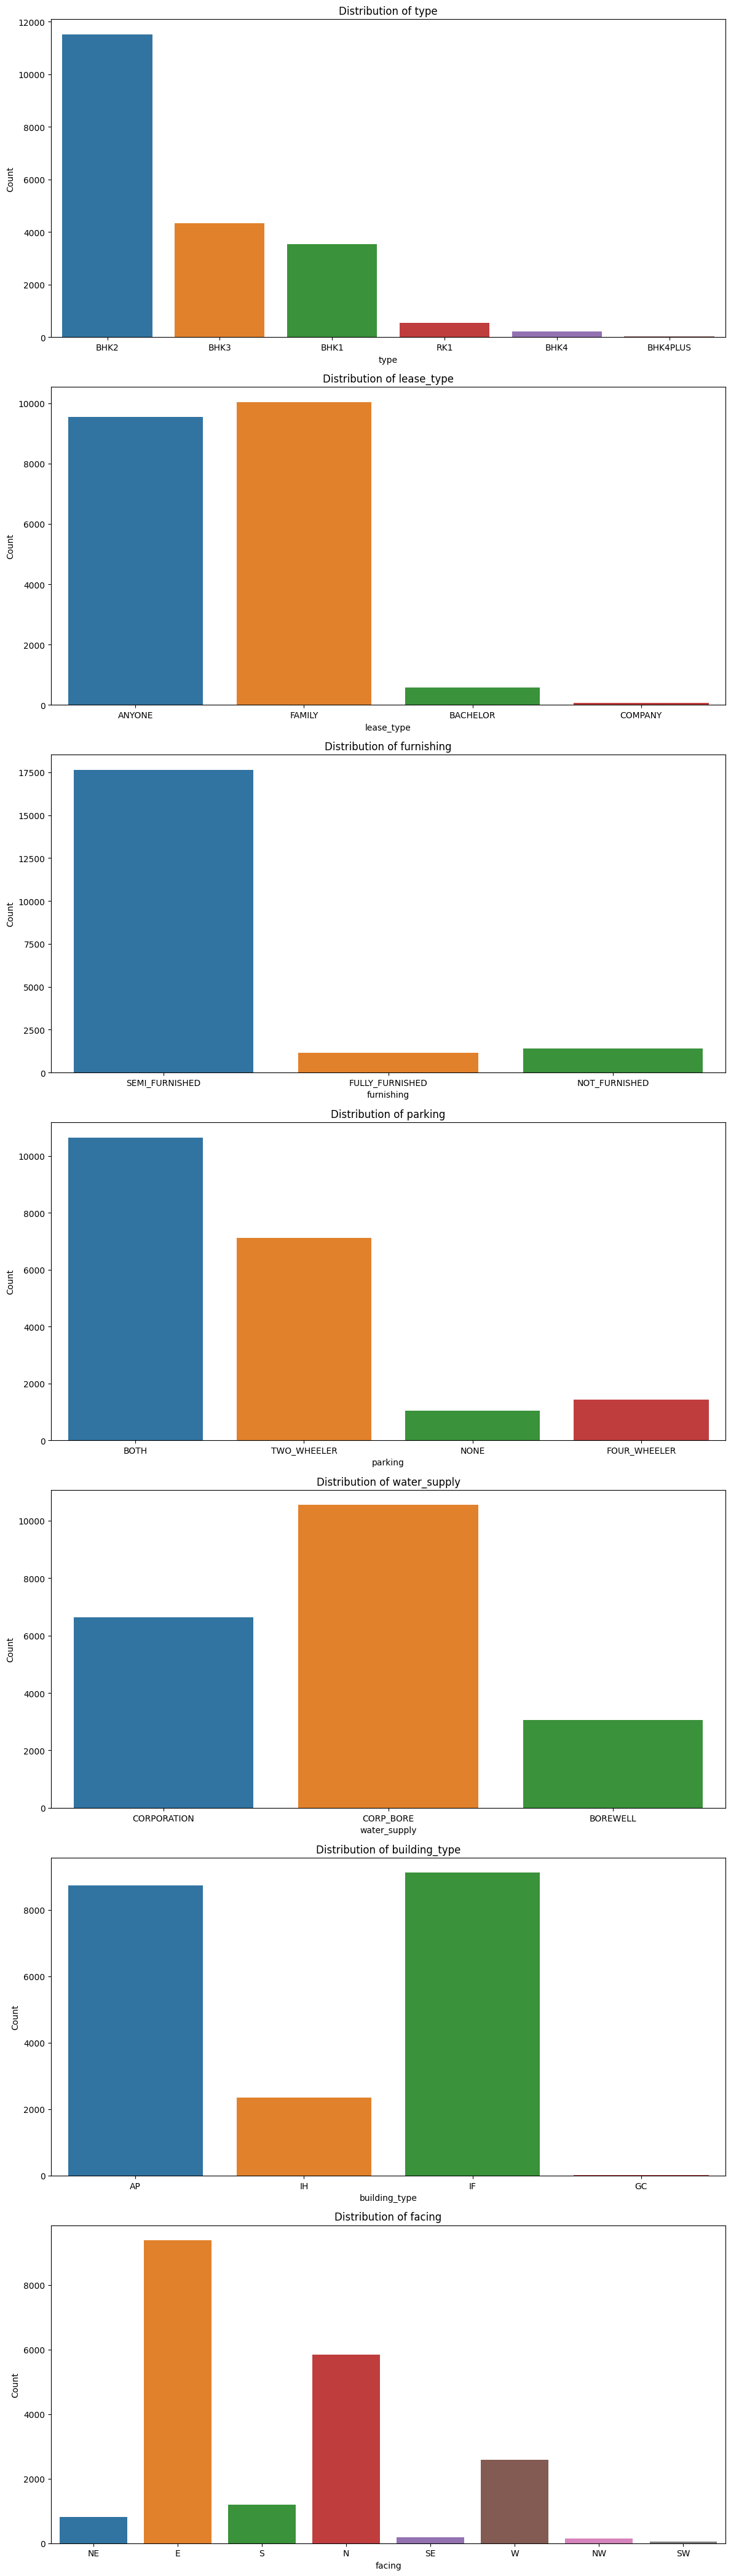

In [70]:
# Categorical features in your DataFrame
categorical_features = ['type', 'lease_type', 'furnishing', 'parking', 'water_supply', 'building_type', 'facing']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(12, 6 * len(categorical_features)))

# Plot count plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df_train, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# observations from the count of categories in each feature:

## type:

The majority of properties are of type 'BHK2', followed by 'BHK3' and 'BHK1'.
There are also a considerable number of properties labeled as 'RK1', 'BHK4', and 'BHK4PLUS', with 'BHK4PLUS' having the least count.
### lease_type:

The most common lease type is 'FAMILY', followed closely by 'ANYONE'.
There are fewer properties available for 'BACHELOR' and even fewer for 'COMPANY' lease types.
### furnishing:

The majority of properties are 'SEMI_FURNISHED', indicating that a significant portion of properties comes with some level of furnishing.
There are also properties that are 'NOT_FURNISHED' and 'FULLY_FURNISHED', though they are less common.
### parking:

A large number of properties have parking available for both two-wheelers and four-wheelers ('BOTH').
'TWO_WHEELER' parking is also common, while 'FOUR_WHEELER' and 'NONE' parking options are less frequent.
### facing:

The most common facing direction is 'E' (East), followed by 'N' (North) and 'W' (West).
Other facing directions ('S', 'NE', 'SE', 'NW', 'SW') have lower counts.
### water_supply:

The majority of properties have 'CORP_BORE' as their water supply source, followed by 'CORPORATION' and 'BOREWELL'.
### building_type:

The most common building types are 'IF' and 'AP', with 'IF' having a slightly higher count.
'IH' (Independent House) is less common, and 'GC' (Guest House) has the least count.

# To see the descriptive information about the numerical features in dataframe

In [71]:
numerical_summary = df_train[numerical_features].describe()
print(numerical_summary)

           latitude     longitude           gym          lift  swimming_pool  \
count  20225.000000  20225.000000  20225.000000  20225.000000   20225.000000   
mean      12.945758     77.637287      0.226700      0.361335       0.175130   
std        0.029579      0.111031      0.418707      0.480399       0.380087   
min       12.900004     77.500072      0.000000      0.000000       0.000000   
25%       12.918262     77.571891      0.000000      0.000000       0.000000   
50%       12.943805     77.633484      0.000000      0.000000       0.000000   
75%       12.970922     77.695718      0.000000      1.000000       0.000000   
max       12.999999     80.266346      1.000000      1.000000       1.000000   

         negotiable  property_size  property_age      bathroom     cup_board  \
count  20225.000000   20225.000000  20225.000000  20225.000000  20225.000000   
mean       0.711248    1061.767417      5.776910      1.858344      4.586354   
std        0.453193     592.302114     

# Observations and Inferences:

## Latitude and Longitude:

- Latitude values range from approximately 12.9 to 13.0, and longitude values range from approximately 77.5 to 80.3.
- The dataset seems to cover a specific geographical area, possibly a city or a specific region.

## Amenities (Gym, Lift, Swimming Pool, Internet, AC, Club, Intercom, Servant, Security, Park, Housekeeping):

- These features are binary (0 or 1) indicating the presence (1) or absence (0) of the respective amenities.
- On average, gyms are present in approximately 23% of the properties, lifts in 36%, swimming pools in 18%, internet in 4%, AC in 19%, club facilities in 19%, intercom in 4%, servant quarters in 4%, security in 37%, parks in 47%, and housekeeping in 51%.
- Some features, such as internet, intercom, servant, and housekeeping, are less common, with a presence in less than 5% of the properties.

## Property Size:

- The property size varies widely, with a minimum of 1 and a maximum of 50,000.
- The mean property size is approximately 1062 square units, with a standard deviation of 592.3.
- The 25th percentile (Q1) is 700, the median (Q2) is 1047, and the 75th percentile (Q3) is 1281.

## Property Age:

- Property age ranges from -1 to 21, with a mean age of approximately 5.78.
- There is an anomaly in the minimum property age, indicated by a negative value. Further investigation is needed to understand and potentially correct this discrepancy..

## Bathroom Count:

- The number of bathrooms in properties ranges from 1 to 21, with an average of approximately 1.86.
- The majority of properties seem to have 1 or 2 bathrooms, as suggested by the high count at these values.

## Cupboard Count:

- The count of cupboards in properties ranges from 0 to 48026, with an average count of approximately 4.59.
- There is a significant standard deviation (337.69), indicating a wide variability in the number of cupboards.
- The minimum count is 0, suggesting that some properties might not have cupboards, while the maximum count of 48026 appears to be an outlier. Further investigation is required to understand and potentially handle this outlier.

## Floor and Total Floor:

- Floor values range from 0 to 25, with an average of approximately 1.87.
- Total floor values range from 0 to 26, with an average of approximately 3.80.
- Both floor and total floor features represent the property's vertical position. The presence of properties with 0 floors might indicate some missing or inaccurate data. Further investigation is needed.

## Number of Balconies:

- The number of balconies in properties ranges from 0 to 13, with an average of approximately 1.15.
- The majority of properties seem to have 0 or 1 balcony, as suggested by the high count at these values

## Rent:

- Rent values vary widely, with a minimum of 8000 and a maximum of 50,000.
- The mean rent is approximately 19054.90, with a standard deviation of 8434.12.
- The 25th percentile (Q1) is 12500, the median (Q2) is 17500, and the 75th percentile (Q3) is 24000.

## Potential Outliers:

- Potential outliers can be identified by comparing the maximum values to the upper bounds of the interquartile range (IQR) for features like property size, bathrooms, cupboard, floor, total floor, and rent.

## Overall:

- The dataset includes a diverse range of properties with varying sizes and ages.
- Anomalies such as negative property age values should be addressed and investigated for data integrity.
- Further analysis, such as checking for outliers and understanding the distribution of features, is necessary to gain more insights into the dataset.
- The dataset includes properties with varying counts of cupboards, floors, total floors, balconies, and rent.
- Outliers, such as the extremely high cupboard count and properties with 0 floors, should be investigated further to ensure data quality.
- Further analysis, such as checking for outliers, understanding the distribution of features, and addressing anomalies, is necessary to gain a more comprehensive understanding of the dataset.

In [72]:
# Selecting the numerical features for skewness of dataframe

numerical_features = ['latitude', 'longitude', 'property_size', 'property_age', 'bathroom', 'cup_board', 'floor',
                       'total_floor', 'balconies', 'rent']

# Select numerical features
numerical_df = df_train[numerical_features]

# Calculate skewness for each feature
skewness = numerical_df.skew()

# Display skewness values
print("Skewness for each numerical feature:")
print(skewness)

Skewness for each numerical feature:
latitude           0.131722
longitude         13.536123
property_size     29.330108
property_age      13.437956
bathroom           1.534036
cup_board        142.210127
floor              2.928706
total_floor        2.703088
balconies          0.860156
rent               1.065784
dtype: float64


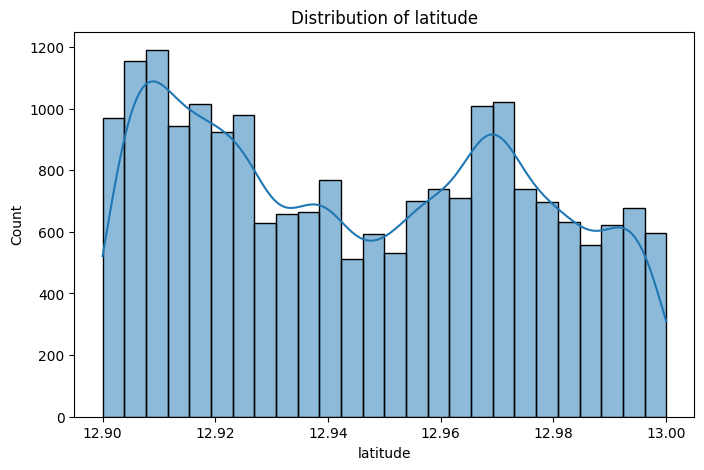

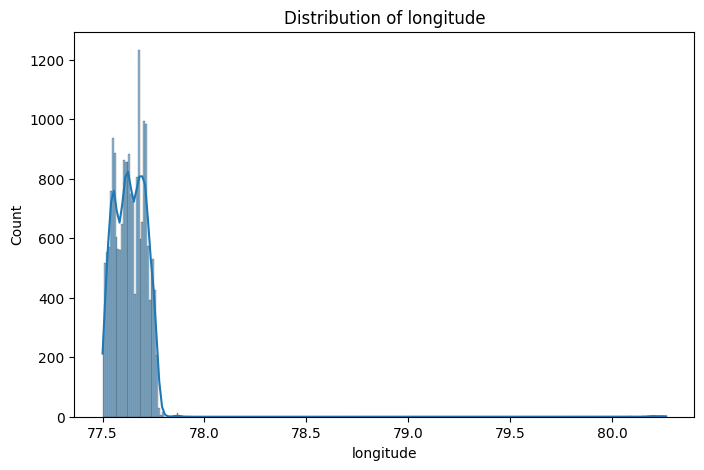

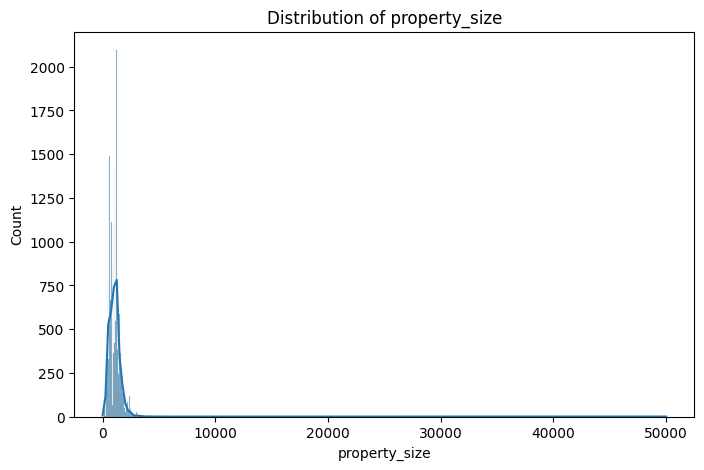

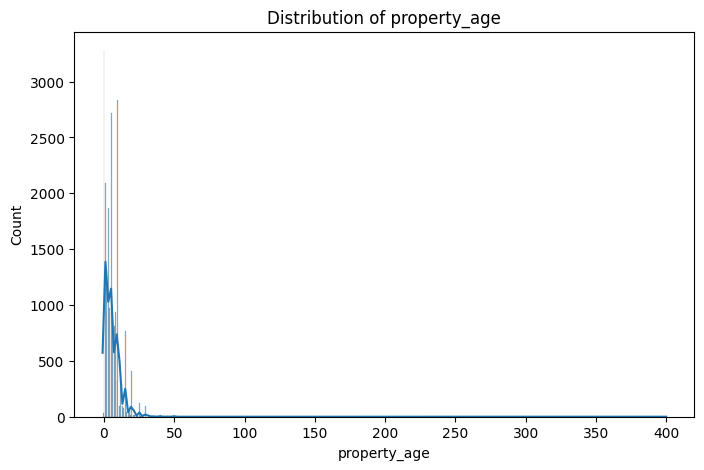

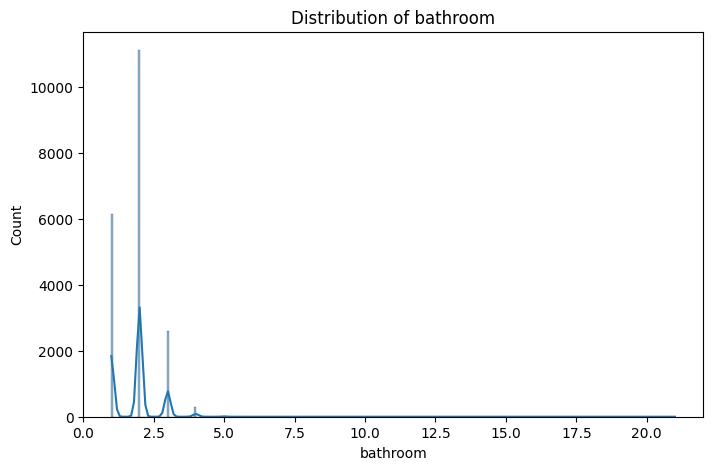

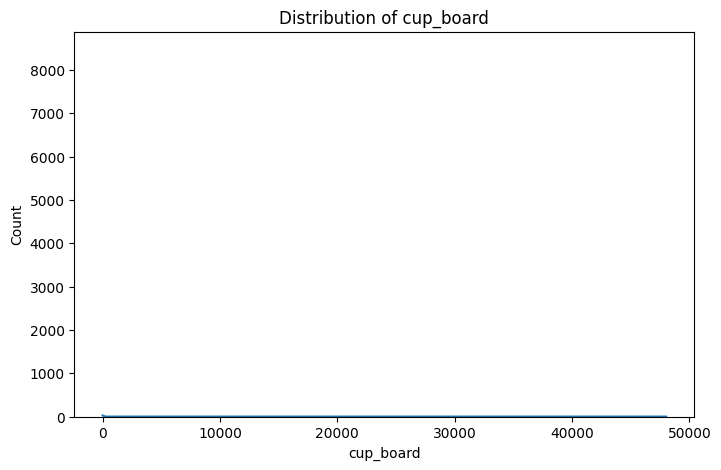

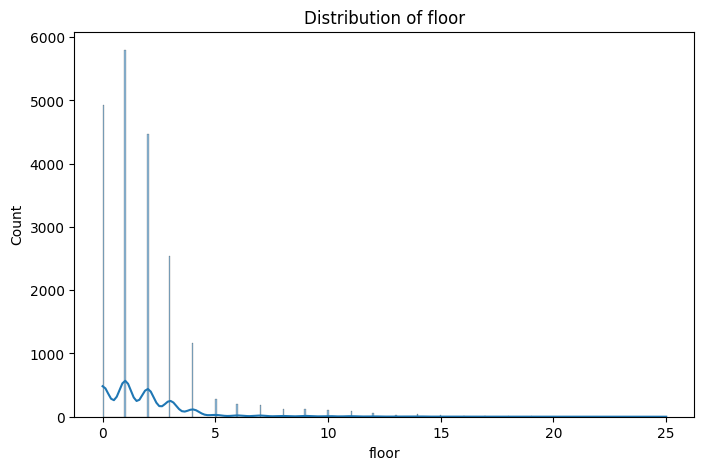

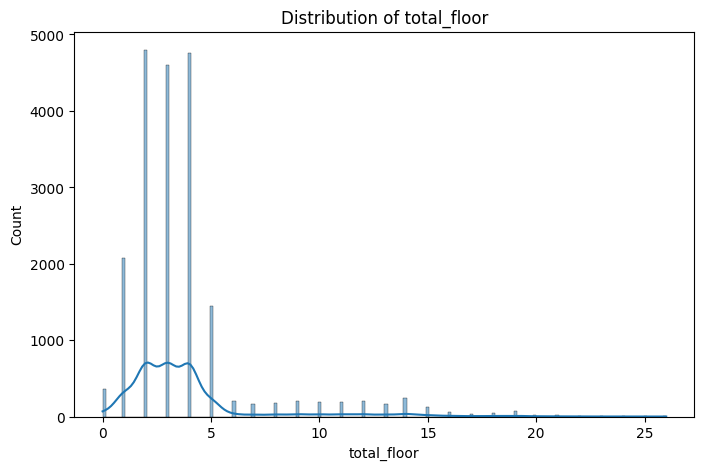

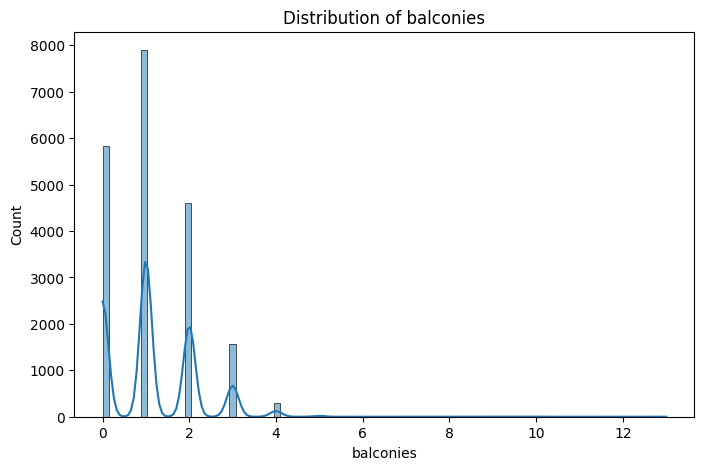

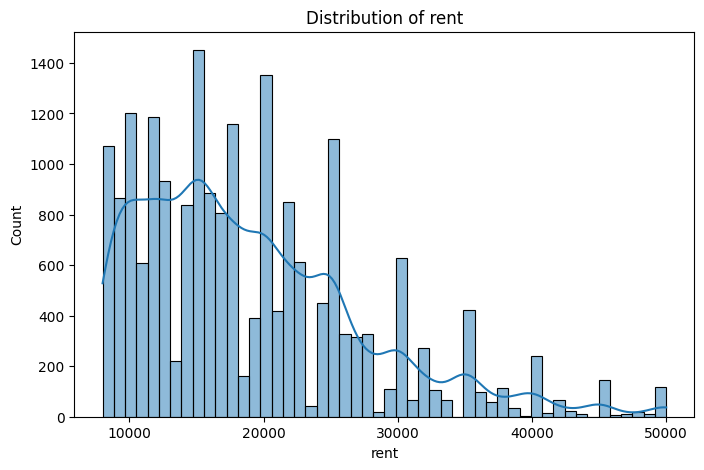

In [73]:
# Numerical Features
numerical_features = ['latitude', 'longitude', 'property_size', 'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent']

# Plot histograms for each numerical feature
for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


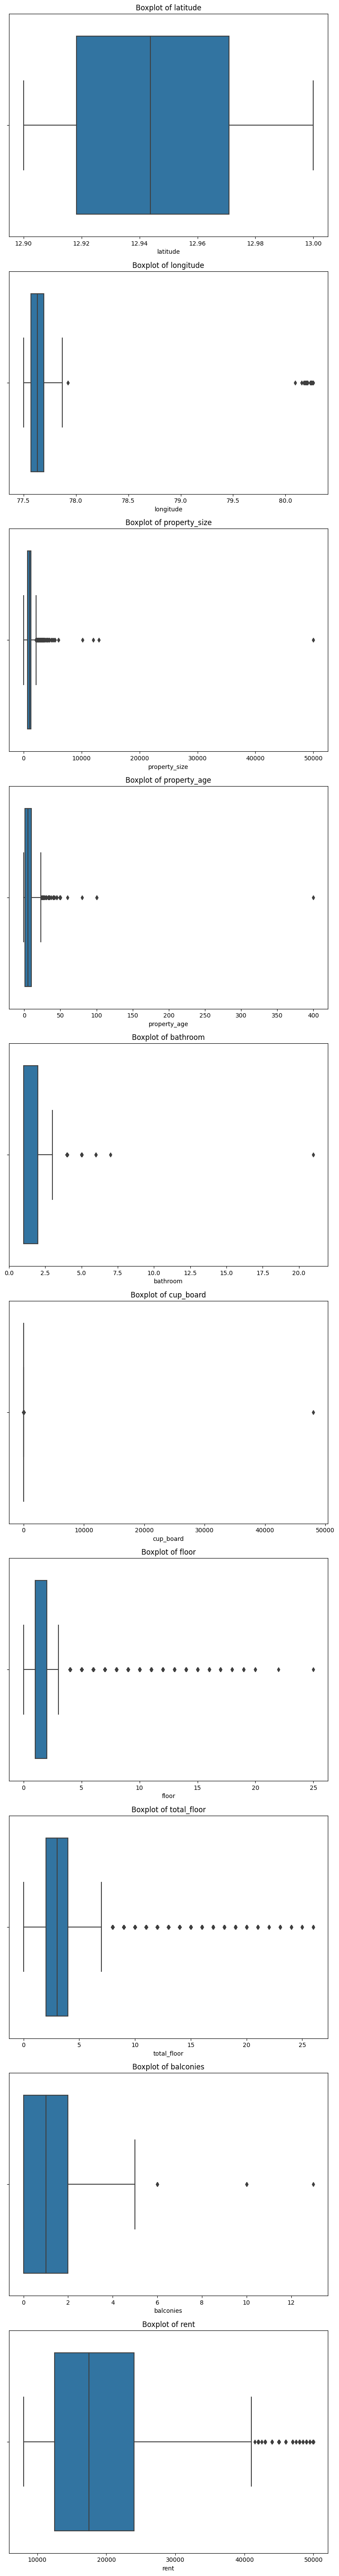

In [74]:
# Numerical features in  DataFrame
numerical_features = ['latitude', 'longitude', 'property_size', 'property_age', 'bathroom', 'cup_board', 'floor',
                       'total_floor', 'balconies', 'rent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 6 * len(numerical_features)))

# Plot box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df_train[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

## Data Distribution Characteristics

The distribution characteristics of each numerical feature offer valuable insights into the spread and shape of the data. Examining these features provides a clear picture of the data distribution:

### Latitude (0.131722):

The latitude feature exhibits a distribution close to normal, indicating a relatively balanced spread of data.

### Longitude (13.536123):

Longitude shows a high positive skewness, suggesting a distribution that is skewed to the right. This implies the presence of properties with extremely high longitudes, influencing the rightward shift.

### Property Size (29.330108):

Property size displays a significant positive skewness, indicating a right-skewed distribution. This suggests the existence of properties with exceptionally large sizes, contributing to the rightward skew.

### Property Age (13.437956):

Property age is positively skewed, implying a distribution with a tail on the right. This indicates the presence of properties with older ages, contributing to the rightward skew.

### Bathroom (1.534036):

The bathroom feature is positively skewed, signifying a right-skewed distribution. This suggests the presence of properties with a higher number of bathrooms, influencing the rightward shift.

### Cupboard (142.210127):

Cupboard exhibits an extremely high positive skewness, indicating a heavily right-skewed distribution. This implies the presence of properties with a significantly larger number of cupboards, contributing to the rightward skew.

### Floor (2.928706):

Floor shows positive skewness, indicating a rightward skew. This suggests the presence of properties with higher floor numbers, contributing to the rightward shift.

### Total Floor (2.703088):

Total floor displays positive skewness, suggesting a right-skewed distribution. This implies the existence of properties with a higher total number of floors, influencing the rightward shift.

### Balconies (0.860156):

Balconies exhibit a slight positive skewness, indicating a rightward tail in the distribution. This suggests the presence of properties with more balconies, but the skewness is not highly pronounced.

### Rent (1.065784):

Rent has a positive skewness, suggesting a right-skewed distribution. T


## 1. Correlation Analysis:

### - How does the number of bedrooms and bathrooms affect the rent price?

In [75]:
df_train["type"].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

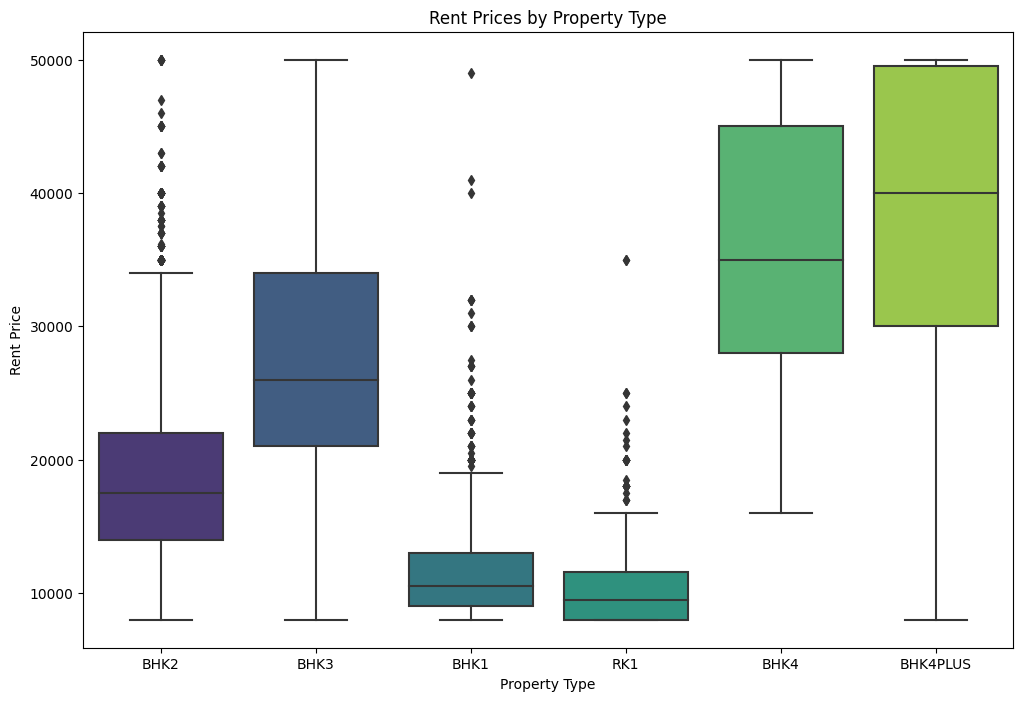

In [76]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='rent', data=df_train, palette='viridis')
plt.title('Rent Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent Price')
plt.show()

In [77]:
summary_stats = df_train.groupby('type')['rent'].describe()
print(summary_stats)

            count          mean           std      min      25%      50%  \
type                                                                       
BHK1       3553.0  11423.582606   3329.553455   8000.0   9000.0  10500.0   
BHK2      11521.0  18213.194688   5972.497786   8000.0  14000.0  17500.0   
BHK3       4342.0  27583.369415   8474.520101   8000.0  21000.0  26000.0   
BHK4        231.0  35716.450216   9293.798187  16000.0  28000.0  35000.0   
BHK4PLUS     30.0  38483.333333  12334.758383   8000.0  30000.0  40000.0   
RK1         548.0  10567.974453   3437.303546   8000.0   8000.0   9500.0   

              75%      max  
type                        
BHK1      13000.0  49000.0  
BHK2      22000.0  50000.0  
BHK3      34000.0  50000.0  
BHK4      45000.0  50000.0  
BHK4PLUS  49500.0  50000.0  
RK1       11562.5  35000.0  


# Observations for Rent Prices Based on Property Type

## BHK1 (1 BHK):

- The dataset includes 3,553 properties classified as BHK1.
- The average rent for BHK1 properties is approximately ₹11,423, with a standard deviation of ₹3,329.
- Rent prices range from ₹8,000 to ₹49,000.
- The 25th percentile (Q1) is ₹9,000, the median (Q2) is ₹10,500, and the 75th percentile (Q3) is ₹13,000.

## BHK2 (2 BHK):

- There are 11,521 properties classified as BHK2.
- The mean rent for BHK2 properties is around ₹18,213, with a standard deviation of ₹5,972.
- Rent prices for BHK2 range from ₹8,000 to ₹50,000.
- The 25th percentile (Q1) is ₹14,000, the median (Q2) is ₹17,500, and the 75th percentile (Q3) is ₹22,000.

## BHK3 (3 BHK):

- The dataset includes 4,342 properties classified as BHK3.
- The average rent for BHK3 properties is approximately ₹27,583, with a standard deviation of ₹8,474.
- Rent prices vary between ₹8,000 and ₹50,000.
- The 25th percentile (Q1) is ₹21,000, the median (Q2) is ₹26,000, and the 75th percentile (Q3) is ₹34,000.

## BHK4 (4 BHK):

- There are 231 properties classified as BHK4.
- The mean rent for BHK4 properties is approximately ₹35,716, with a standard deviation of ₹9,294.
- Rent prices range from ₹16,000 to ₹50,000.
- The 25th percentile (Q1) is ₹28,000, the median (Q2) is ₹35,000, and the 75th percentile (Q3) is ₹45,000.

## BHK4PLUS (4 BHK Plus):

- There are 30 properties classified as BHK4PLUS.
- The average rent for BHK4PLUS properties is approximately ₹38,483, with a standard deviation of ₹12,335.
- Rent prices vary between ₹8,000 and ₹50,000.
- The 25th percentile (Q1) is ₹30,000, the median (Q2) is ₹40,000, and the 75th percentile (Q3) is ₹49,500.

## RK1 (Room Kitchen 1):

- The dataset includes 548 properties classified as RK1.
- The mean rent for RK1 properties is approximately ₹10,568, with a standard deviation of ₹3,437.
- Rent prices range from ₹8,000 to ₹35,000.
- The 25th percentile (Q1) is ₹8,000, the median (Q2) is ₹9,500, and the 75th percentile (Q3) is ₹11,562.5.

## Overall Observations:

- The dataset encompasses various property types with different rent price distributions.
- The number of bedrooms (BHK) appears to have a positive correlation with rent prices, with larger BHK categories generally having higher rents.
- Additionally, RK1 properties, indicating single-room units, tend to have lower average rents compared to BHK properties.


## No of bathroom Vs rent 

In [78]:
summary_stats = df_train.groupby('bathroom')['rent'].describe()
print(summary_stats)

            count          mean           std      min      25%      50%  \
bathroom                                                                   
1.0        6168.0  12147.598573   3716.391498   8000.0   9500.0  11500.0   
2.0       11133.0  19915.264619   6301.536530   8000.0  15000.0  19500.0   
3.0        2603.0  29626.744526   8674.980266   8000.0  23000.0  30000.0   
4.0         284.0  35843.309859   9101.174018  14500.0  30000.0  35000.0   
5.0          32.0  40265.625000   9375.658579  20000.0  35000.0  41500.0   
6.0           3.0  27666.666667  16165.807537  13000.0  19000.0  25000.0   
7.0           1.0  46000.000000           NaN  46000.0  46000.0  46000.0   
21.0          1.0  27000.000000           NaN  27000.0  27000.0  27000.0   

              75%      max  
bathroom                    
1.0       14000.0  49000.0  
2.0       24000.0  50000.0  
3.0       35000.0  50000.0  
4.0       45000.0  50000.0  
5.0       48500.0  50000.0  
6.0       35000.0  45000.0  
7.0    

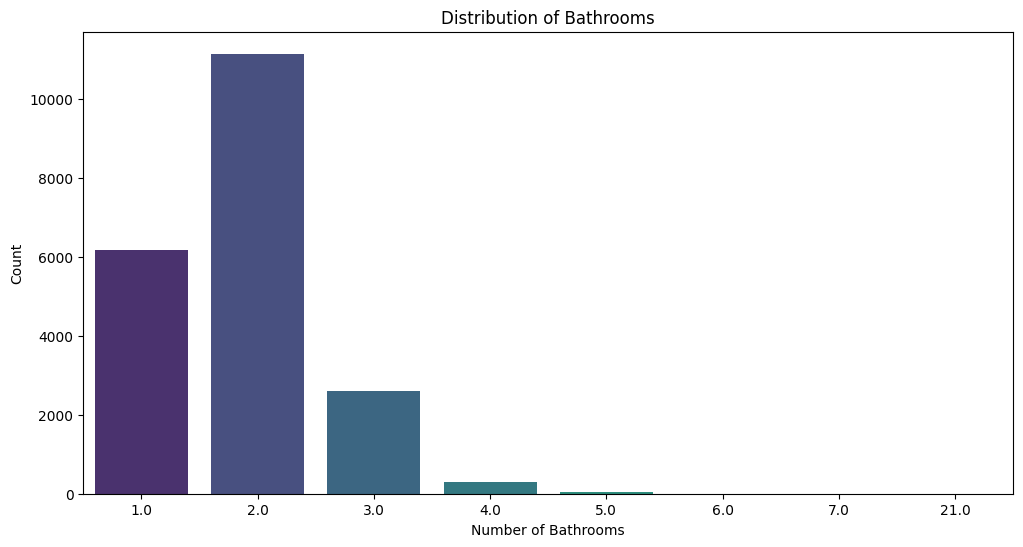

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(x='bathroom', data=df_train, palette='viridis')
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

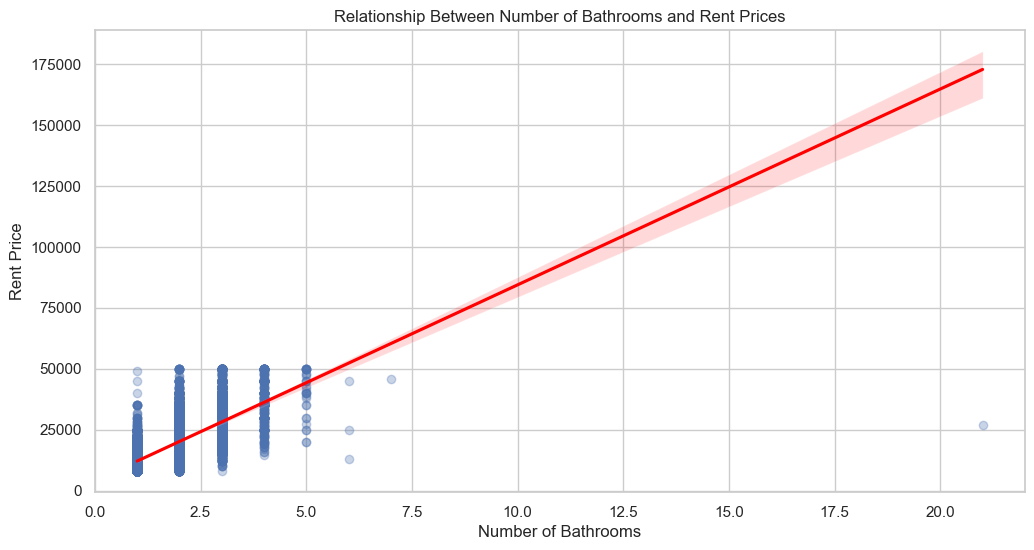

In [80]:
# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
sns.regplot(x='bathroom', y='rent', data=df_train, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

# Set labels and title
plt.title('Relationship Between Number of Bathrooms and Rent Prices')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent Price')

# Show the plot
plt.show()

# Observations and Inferences for Rent Prices Based on the Number of Bathrooms:

## General Trends:

- The dataset includes properties with varying numbers of bathrooms, ranging from 1 to 21.
- As the number of bathrooms increases, the mean rent generally tends to rise.

## 1 Bathroom:

- There are 6,168 properties with 1 bathroom.
- The average rent is ₹12,147, with a standard deviation of ₹3,716.
- Rent prices range from ₹8,000 to ₹49,000.
- The 25th percentile (Q1) is ₹9,500, the median (Q2) is ₹11,500, and the 75th percentile (Q3) is ₹14,000.

## 2 Bathrooms:

- There are 11,133 properties with 2 bathrooms.
- The mean rent for these properties is ₹19,915, with a standard deviation of ₹6,301.
- Rent prices range from ₹8,000 to ₹50,000.
- The 25th percentile (Q1) is ₹15,000, the median (Q2) is ₹19,500, and the 75th percentile (Q3) is ₹24,000.

## 3 Bathrooms:

- There are 2,603 properties with 3 bathrooms.
- The average rent is ₹29,627, with a standard deviation of ₹8,675.
- Rent prices vary from ₹8,000 to ₹50,000.
- The 25th percentile (Q1) is ₹23,000, the median (Q2) is ₹30,000, and the 75th percentile (Q3) is ₹35,000.

## 4 Bathrooms:

- There are 284 properties with 4 bathrooms.
- The mean rent is ₹35,843, with a standard deviation of ₹9,101.
- Rent prices range from ₹14,500 to ₹50,000.
- The 25th percentile (Q1) is ₹30,000, the median (Q2) is ₹35,000, and the 75th percentile (Q3) is ₹45,000.

## 5 Bathrooms:

- There are 32 properties with 5 bathrooms.
- The average rent is ₹40,266, with a standard deviation of ₹9,376.
- Rent prices range from ₹20,000 to ₹50,000.
- The 25th percentile (Q1) is ₹35,000, the median (Q2) is ₹41,500, and the 75th percentile (Q3) is ₹48,500.

## 6 and 7 Bathrooms:

- There are only a few properties with 6 or 7 bathrooms, and the sample size is limited.
- The average rents are ₹27,667 and ₹46,000, respectively.

## Outlier: 21 Bathrooms:

- There is one property with 21 bathrooms, indicating a significant outlier in the dataset.
- The rent for this property is ₹27,000, and it stands alone in the 21 bathrooms category.

## Inference:

- Generally, an increase in the number of bathrooms corresponds to higher average rents.
- The data suggests a positive correlation between the number of bathrooms and rent prices.
- Outliers, such as the property with 21 bathrooms, should be investigated further to ensure data accuracy.


 ## property size vs rent price

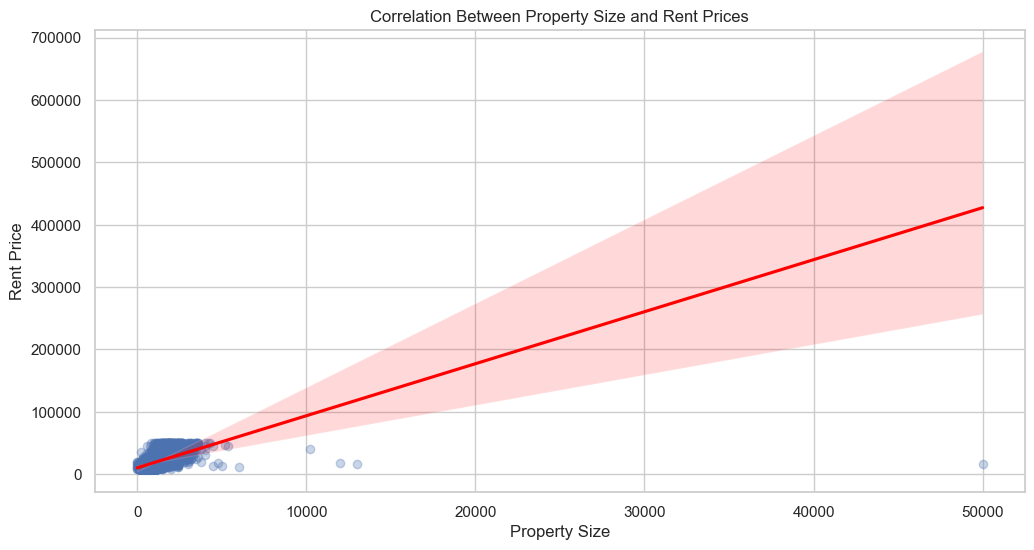

In [81]:
# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
sns.regplot(x='property_size', y='rent', data=df_train, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

# Set labels and title
plt.title('Correlation Between Property Size and Rent Prices')
plt.xlabel('Property Size')
plt.ylabel('Rent Price')

# Show the plot
plt.show()

## Inference:
- Generally, an increase in the size of the propety corresponds to higher average rents.
- The data suggests a positive correlation between the number of bathrooms and rent prices.
- Outliers, such as the property size of 50000 present, should be investigated further to ensure data accuracy.

## Amenities VS Rent

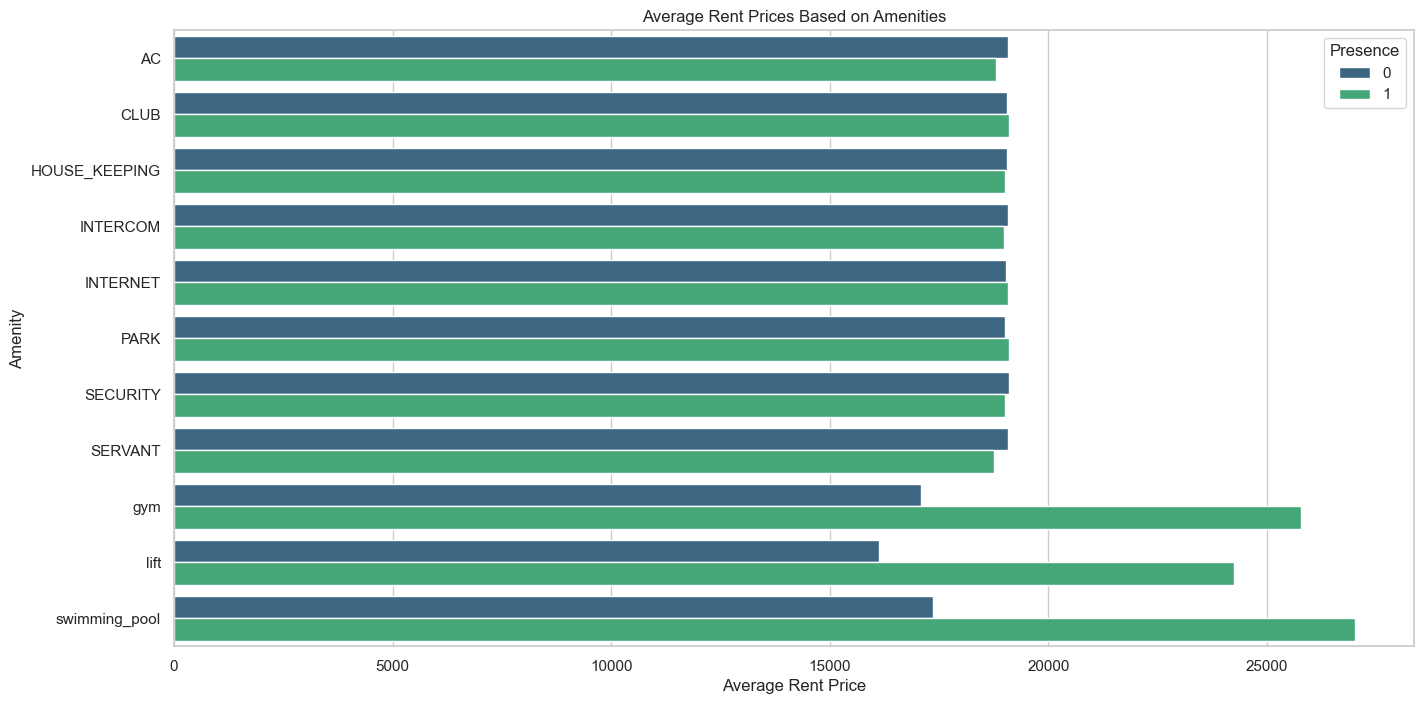

In [82]:
# Define the columns related to amenities
amenities_columns = ['gym', 'lift', 'swimming_pool', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'SERVANT', 'SECURITY', 'PARK', 'HOUSE_KEEPING']

# Melt the dataframe to reshape it for visualization
melted_amenities = pd.melt(df_train, id_vars=['rent'], value_vars=amenities_columns, var_name='amenity', value_name='presence')

# Calculate the average rent price for properties with and without each amenity
amenities_avg_rent = melted_amenities.groupby(['amenity', 'presence']).agg({'rent': 'mean'}).reset_index()

# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Create a grouped bar plot for each amenity
sns.barplot(x='rent', y='amenity', hue='presence', data=amenities_avg_rent, palette='viridis', errorbar=None)

# Set labels and title
plt.title('Average Rent Prices Based on Amenities')
plt.xlabel('Average Rent Price')
plt.ylabel('Amenity')
plt.legend(title='Presence', loc='upper right')

# Show the plot
plt.show()


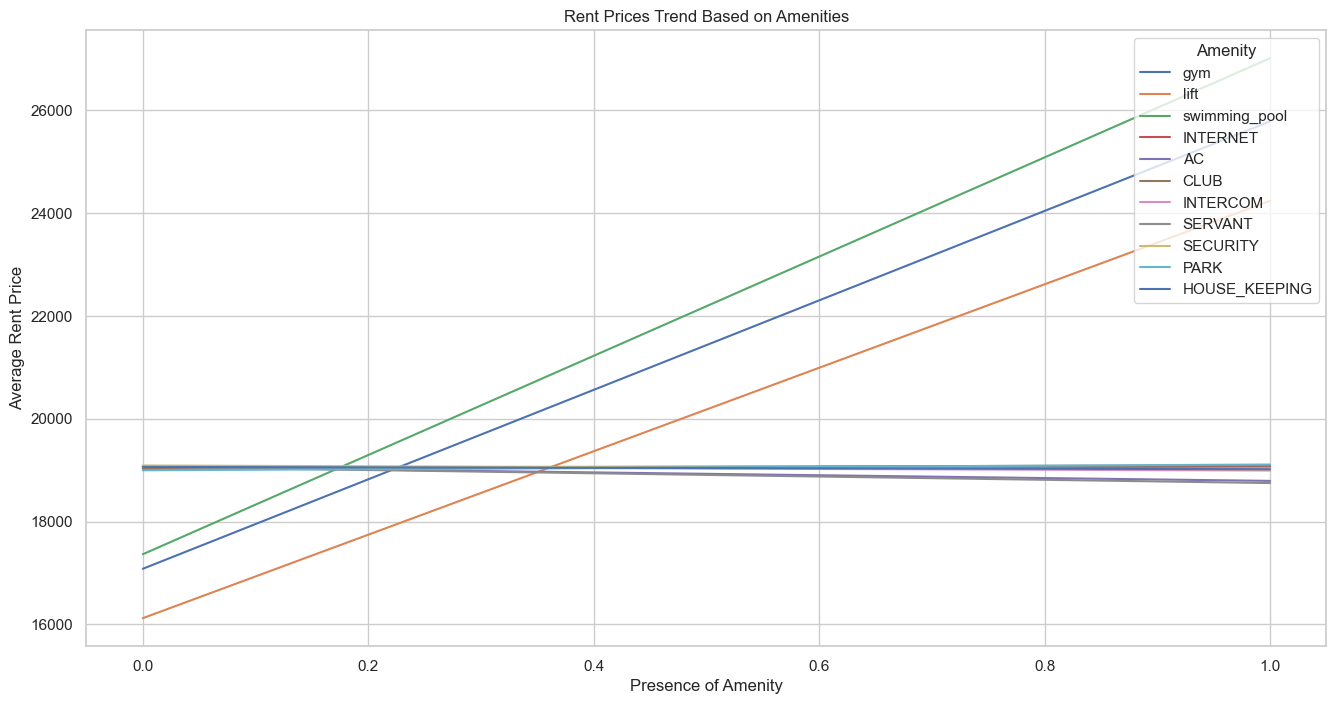

In [83]:
# Define the columns related to amenities
amenities_columns = ['gym', 'lift', 'swimming_pool', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'SERVANT', 'SECURITY', 'PARK', 'HOUSE_KEEPING']
# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Create a line plot for each amenity
for amenity in amenities_columns:
    amenity_rent_trend = df_train.groupby(amenity)['rent'].mean().reset_index()
    sns.lineplot(x=amenity_rent_trend[amenity], y=amenity_rent_trend['rent'], label=amenity)

# Set labels and title
plt.title('Rent Prices Trend Based on Amenities')
plt.xlabel('Presence of Amenity')
plt.ylabel('Average Rent Price')
plt.legend(title='Amenity', loc='upper right')

# Show the plot
plt.show()


# Observation: Impact of Amenities on Rent Prices

- In the analysis of rent prices based on amenities, a distinct pattern emerges from the chart. Notably, amenities such as gym, swimming pool, and lift demonstrate a significant influence on the average rent prices. Properties equipped with these amenities exhibit a substantial increase in rent compared to those without.

- Conversely, the presence or absence of other amenities appears to have a relatively minor impact on rent prices. While these amenities contribute to the overall appeal of a property, their influence on rental rates seems less pronounced.

- In summary, the data suggests a discernible correlation between the presence of specific amenities (gym, swimming pool, and lift) and higher rent prices. However, other amenities do not exhibit a considerable impact on the overall rental pricing. Further exploration of individual amenity categories may provide deeper insights into their respective contributions to rent variations.


# Geospatial Analysis:

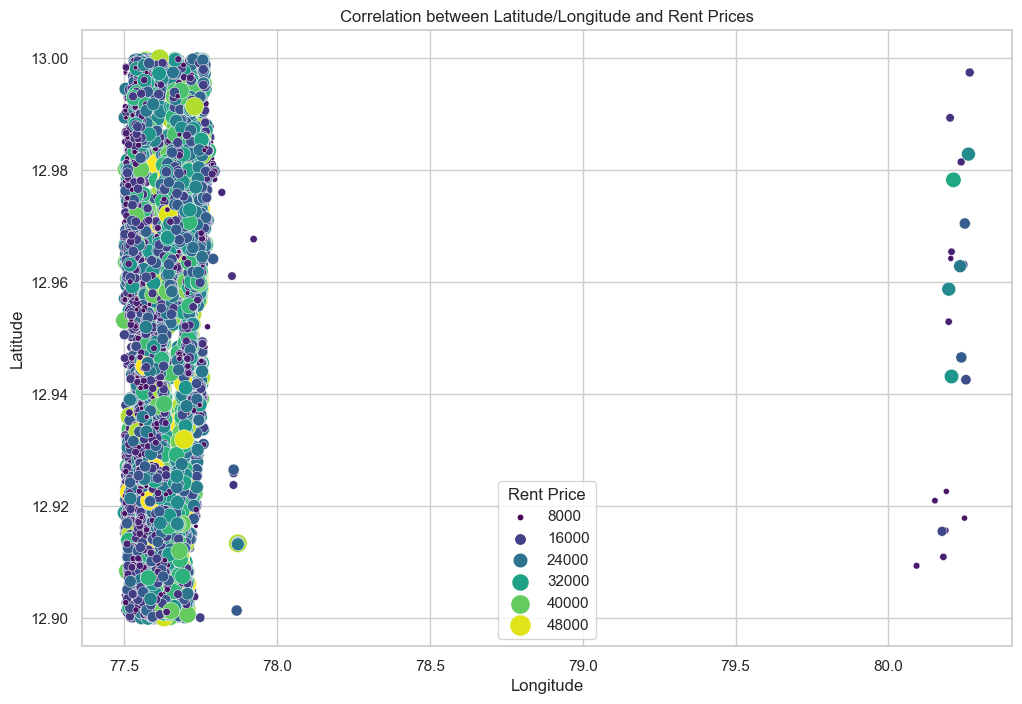

In [84]:
# Scatter plot for latitude vs. longitude with rent prices represented by color
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='rent', data=df_train, palette='viridis', size='rent', sizes=(10, 200))
plt.title('Correlation between Latitude/Longitude and Rent Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Rent Price')

# Show the plot
plt.show()

## Observation:

Upon analyzing the property distribution across the region, a noticeable pattern emerges. The majority of properties are concentrated in a specific part of the region, while some are situated outside this central area.

When examining the relationship between latitude, longitude, and rent prices, a clear trend emerges. Moving from the left side to the right side, there is a discernible increase in the rental prices of properties. This spatial insight suggests a correlation between location and rent, with certain areas commanding higher property values.


#  Temporal Analysis:

# Rent Prices Over Time:

In [85]:
# Print the column names of the DataFrame
print(df_train.columns)

Index(['type', 'activation_date', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'water_supply', 'building_type', 'balconies',
       'rent', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'SERVANT', 'SECURITY',
       'PARK', 'HOUSE_KEEPING'],
      dtype='object')


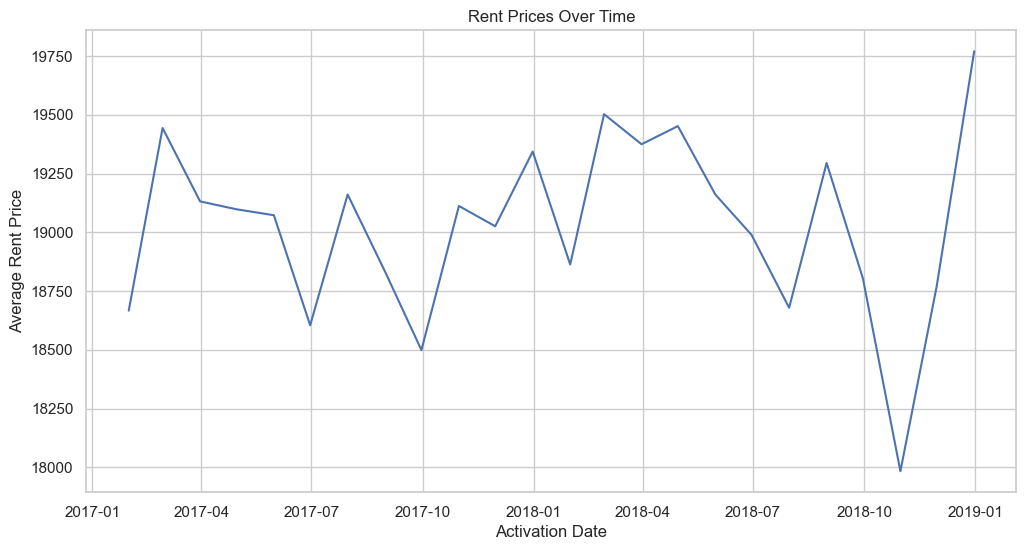

In [86]:
# Convert the activation date to datetime format
df_train['activation_date'] = pd.to_datetime(df_train['activation_date'])
# Set the date as the index for better time-based plotting
df_train.set_index('activation_date', inplace=True)

# Resample the data by month and calculate the mean rent price
monthly_rent_avg = df_train['rent'].resample('M').mean()

# Plot the rent prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_rent_avg.index, y=monthly_rent_avg.values)
plt.title('Rent Prices Over Time')
plt.xlabel('Activation Date')
plt.ylabel('Average Rent Price')
plt.show()

In [87]:
# Reset the index to bring 'activation_date' back as a column
df_train.reset_index(inplace=True)

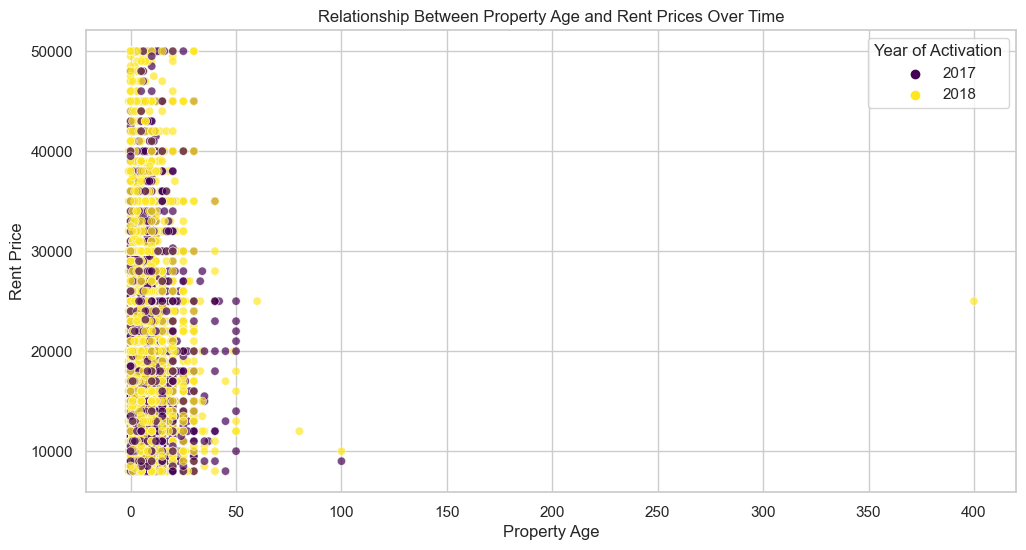

In [88]:
# Convert the activation date to datetime format
df_train['activation_date'] = pd.to_datetime(df_train['activation_date'])

# Set the date as the index for better time-based plotting
df_train.set_index('activation_date', inplace=True)

# Create a scatter plot with property age, rent, and color-coded by activation date
plt.figure(figsize=(12, 6))
sns.scatterplot(x='property_age', y='rent', hue=df_train.index.year, data=df_train, palette='viridis', alpha=0.7)
plt.title('Relationship Between Property Age and Rent Prices Over Time')
plt.xlabel('Property Age')
plt.ylabel('Rent Price')
plt.legend(title='Year of Activation')
plt.show()

# Observation:
## We can see that the most of the properties are form year 2017 and 2018 , while considerably 2017 is higher than 2018 

In [89]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20225 entries, 2017-09-10 to 2018-03-03
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20225 non-null  object 
 1   latitude       20225 non-null  float64
 2   longitude      20225 non-null  float64
 3   lease_type     20225 non-null  object 
 4   gym            20225 non-null  int64  
 5   lift           20225 non-null  int64  
 6   swimming_pool  20225 non-null  int64  
 7   negotiable     20225 non-null  int64  
 8   furnishing     20225 non-null  object 
 9   parking        20225 non-null  object 
 10  property_size  20225 non-null  int64  
 11  property_age   20225 non-null  float64
 12  bathroom       20225 non-null  float64
 13  facing         20225 non-null  object 
 14  cup_board      20225 non-null  float64
 15  floor          20225 non-null  float64
 16  total_floor    20225 non-null  float64
 17  water_supply   20225 non-null  ob

# Property Features and Rent:

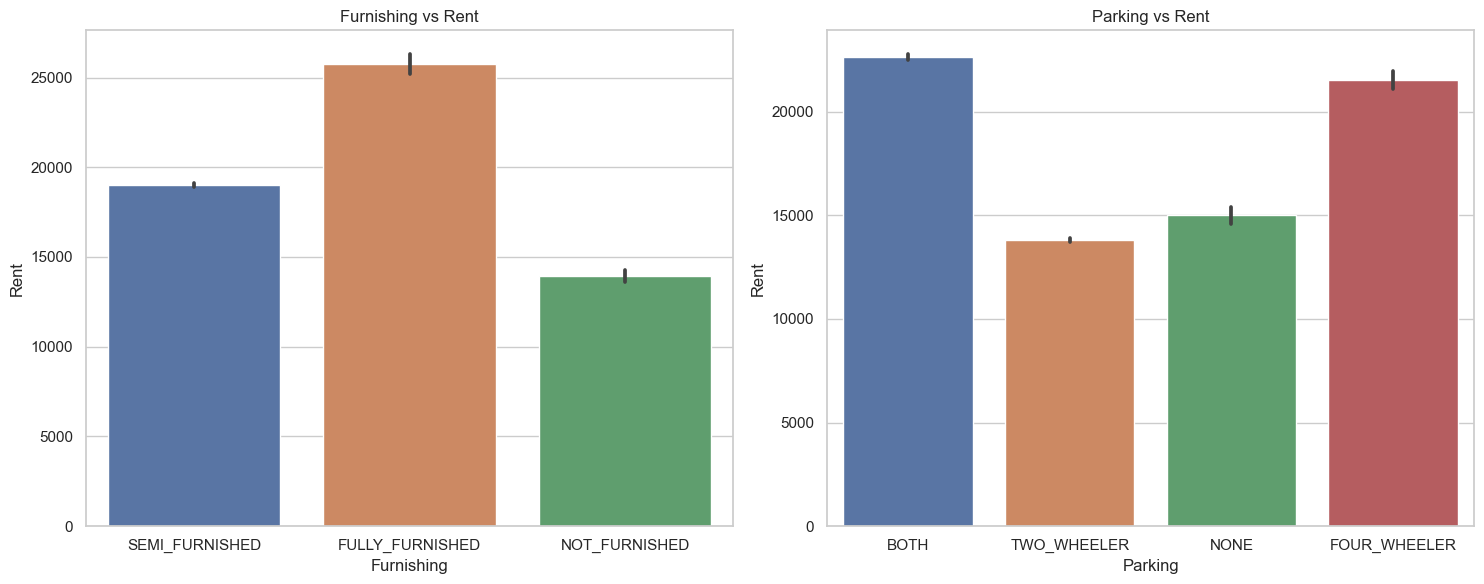

In [90]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Bar plot for 'furnishing' vs 'rent'
sns.barplot(x='furnishing', y='rent', data=df_train, ax=axes[0])
axes[0].set_title('Furnishing vs Rent')
axes[0].set_xlabel('Furnishing')
axes[0].set_ylabel('Rent')

# Bar plot for 'parking' vs 'rent'
sns.barplot(x='parking', y='rent', data=df_train, ax=axes[1])
axes[1].set_title('Parking vs Rent')
axes[1].set_xlabel('Parking')
axes[1].set_ylabel('Rent')

# Adjust layout
plt.tight_layout()
plt.show()


# Inference:

The insights derived from the above chart reveal distinct patterns in rent prices based on furnishing and parking amenities.

## Furnishing:

The chart illustrates a clear correlation between furnishing levels and rent prices:
- **Fully Furnished:** Properties with full furnishing exhibit the highest average rent.
- **Semi-Furnished:** Rent is lower compared to fully furnished properties but higher than unfurnished ones.
- **Unfurnished:** The lowest average rent is observed for unfurnished properties.

This trend suggests that the extent of furnishing significantly influences rental rates, with fully furnished properties commanding the highest values.

## Parking:

The analysis of parking amenities unveils the following trends:
- **With Four-Wheeler Parking:** Properties offering four-wheeler parking spaces demand higher rent.
- **With Two-Wheeler Parking:** Rent is lower compared to four-wheeler parking but higher than properties without parking.
- **Without Parking:** The lowest average rent is observed for properties without parking.

These findings indicate that the availability of parking, especially for four-wheelers, is associated with increased rent prices. However, the absence of parking facilities, or the provision of two-wheeler parking only, results in lower average rents.

In summary, both furnishing and parking play pivotal roles in determining rent prices. Prospective tenants and property owners should consider these factors when assessing property values, and the observed trends can guide decisions related to furnishing levels and parking amenities.


# Building Characteristics:

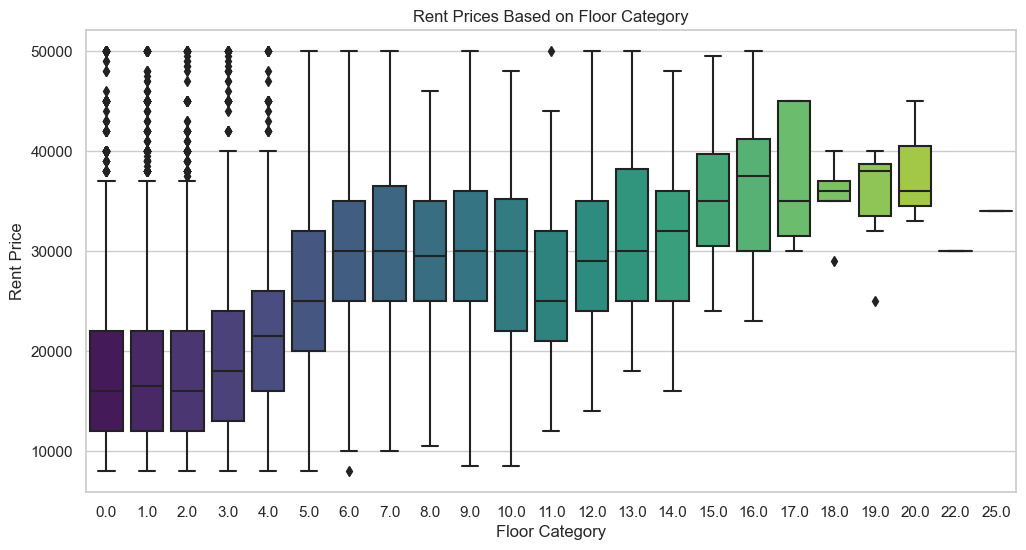

In [91]:
# Create a box plot for 'floor' vs 'rent'
plt.figure(figsize=(12, 6))
sns.boxplot(x='floor', y='rent', data=df_train, palette='viridis')
plt.title('Rent Prices Based on Floor Category')
plt.xlabel('Floor Category')
plt.ylabel('Rent Price')
plt.show()


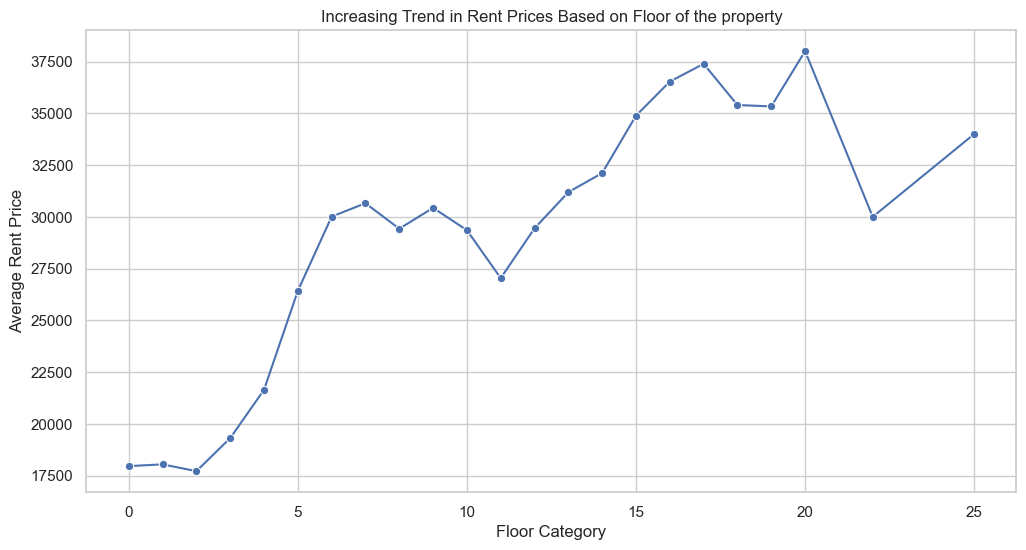

In [92]:
# Create a line plot for 'floor' vs 'rent'
plt.figure(figsize=(12, 6))
sns.lineplot(x='floor', y='rent', data=df_train.groupby('floor')['rent'].mean().reset_index(), marker='o', color='b')
plt.title('Increasing Trend in Rent Prices Based on Floor of the property')
plt.xlabel('Floor Category')
plt.ylabel('Average Rent Price')
plt.show()


In [93]:
summary_stats = df_train.groupby('floor')['rent'].describe()
print(summary_stats)

        count          mean          std      min      25%      50%      75%  \
floor                                                                          
0.0    4932.0  17963.958637  8304.372554   8000.0  12000.0  16000.0  22000.0   
1.0    5797.0  18049.648611  7665.604626   8000.0  12000.0  16471.0  22000.0   
2.0    4475.0  17720.043128  7472.111180   8000.0  12000.0  16000.0  22000.0   
3.0    2548.0  19314.733516  8079.820459   8000.0  13000.0  18000.0  24000.0   
4.0    1173.0  21647.306905  8207.146292   8000.0  16000.0  21500.0  26000.0   
5.0     283.0  26424.438163  9254.308677   8000.0  20000.0  25000.0  32000.0   
6.0     203.0  30011.330049  8551.435506   8000.0  25000.0  30000.0  35000.0   
7.0     187.0  30657.754011  8263.664557  10000.0  25000.0  30000.0  36500.0   
8.0     119.0  29427.310924  7311.526620  10500.0  25000.0  29500.0  35000.0   
9.0     129.0  30434.085271  8180.705452   8500.0  25000.0  30000.0  36000.0   
10.0    100.0  29357.000000  8429.952071

# Distribution Overview:

- The dataset includes properties with floor levels ranging from 0 to 25.
- Each floor level category has a different count of properties.

# Rent Trends Across Floor Levels:

## Lower Floor Levels (0 to 5):

- Properties on lower floor levels (0 to 5) exhibit a gradual increase in mean rent prices.
- The median rent tends to rise, with a noticeable increase in variability (standard deviation) as the floor level increases.
- This suggests that properties on lower floor levels generally have lower rents, with some exceptions having higher rents.

## Mid to Higher Floor Levels (6 to 20):

- Properties on mid to higher floor levels (6 to 20) show a more varied pattern.
- The mean rent initially increases, reaching a peak, and then experiences some fluctuations.
- Median rent prices also demonstrate variability, indicating diverse rent distributions for different floor levels.

## Extreme Floor Levels (22, 25):

- The dataset includes limited data points for extreme floor levels (22, 25).
- These extreme floor levels have specific rent values, and the sample size is not sufficient for robust generalizations.

# Outliers and Unusual Observations:

- Some floor levels, such as 18, 19, and 20, exhibit a higher mean rent but have a limited number of properties, suggesting potential outliers or specific property characteristics.



# Total Floor in property Vs Rent 

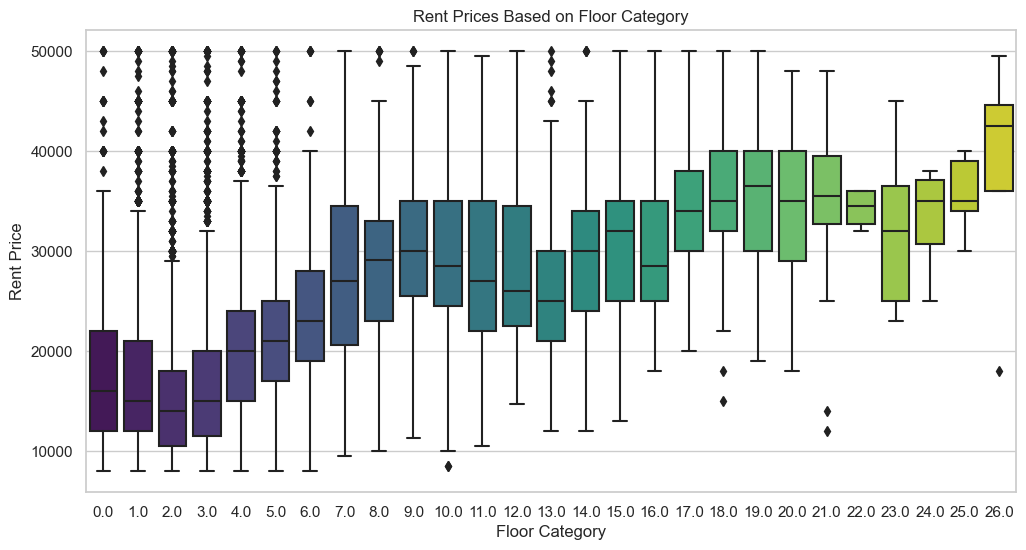

In [94]:
# Create a box plot for 'total_floor' vs 'rent'
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_floor', y='rent', data=df_train, palette='viridis')
plt.title('Rent Prices Based on Floor Category')
plt.xlabel('Floor Category')
plt.ylabel('Rent Price')
plt.show()


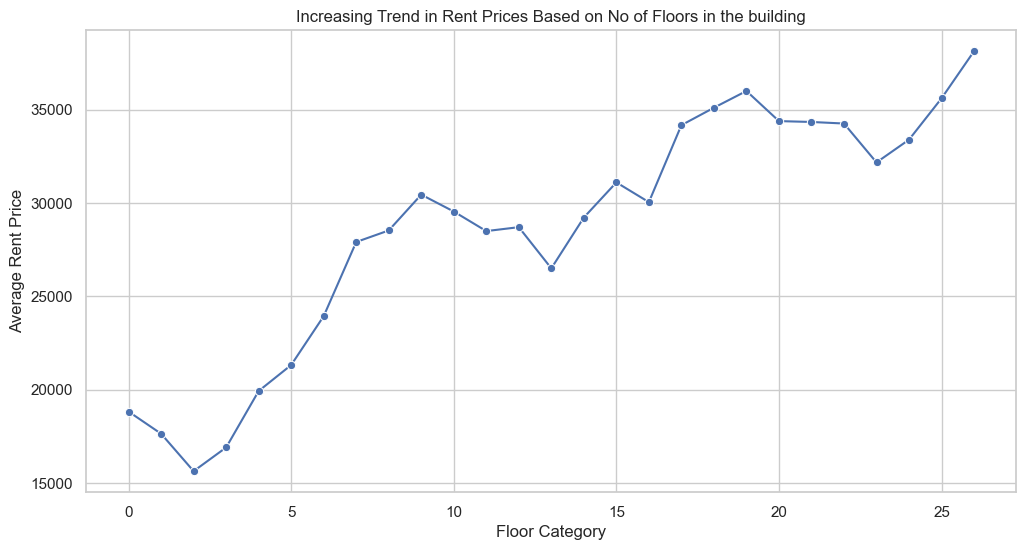

In [95]:
# Create a line plot for 'total_floor' vs 'rent'
plt.figure(figsize=(12, 6))
sns.lineplot(x='total_floor', y='rent', data=df_train.groupby('total_floor')['rent'].mean().reset_index(), marker='o', color='b')
plt.title('Increasing Trend in Rent Prices Based on No of Floors in the building')
plt.xlabel('Floor Category')
plt.ylabel('Average Rent Price')
plt.show()


# Negotiability and Rent:

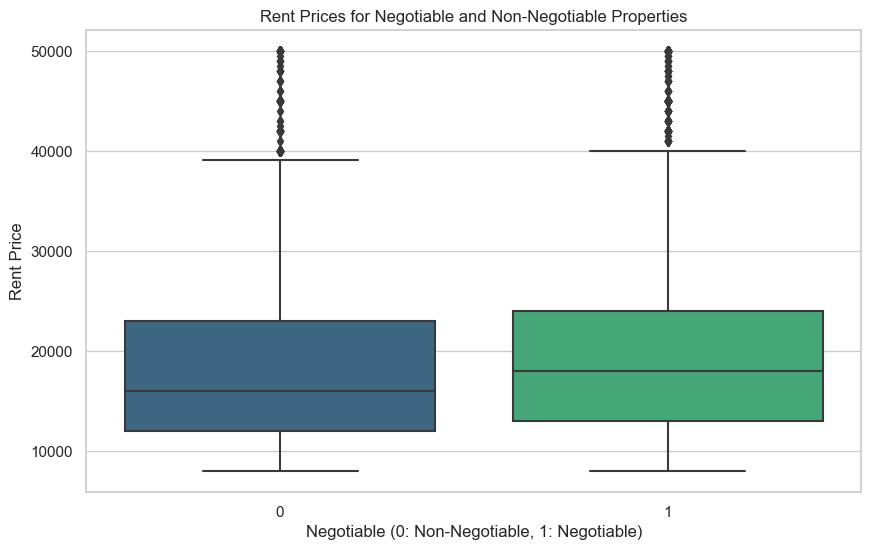

In [96]:
# Create a box plot to compare rent prices for negotiable and non-negotiable properties
plt.figure(figsize=(10, 6))
sns.boxplot(x='negotiable', y='rent', data=df_train, palette='viridis')
plt.title('Rent Prices for Negotiable and Non-Negotiable Properties')
plt.xlabel('Negotiable (0: Non-Negotiable, 1: Negotiable)')
plt.ylabel('Rent Price')
plt.show()

## Observation:

The analysis reveals a clear association between negotiable terms and property rent. Specifically, when negotiable terms are indicated as "yes," the rent tends to be higher compared to instances where negotiable terms are marked as "no."


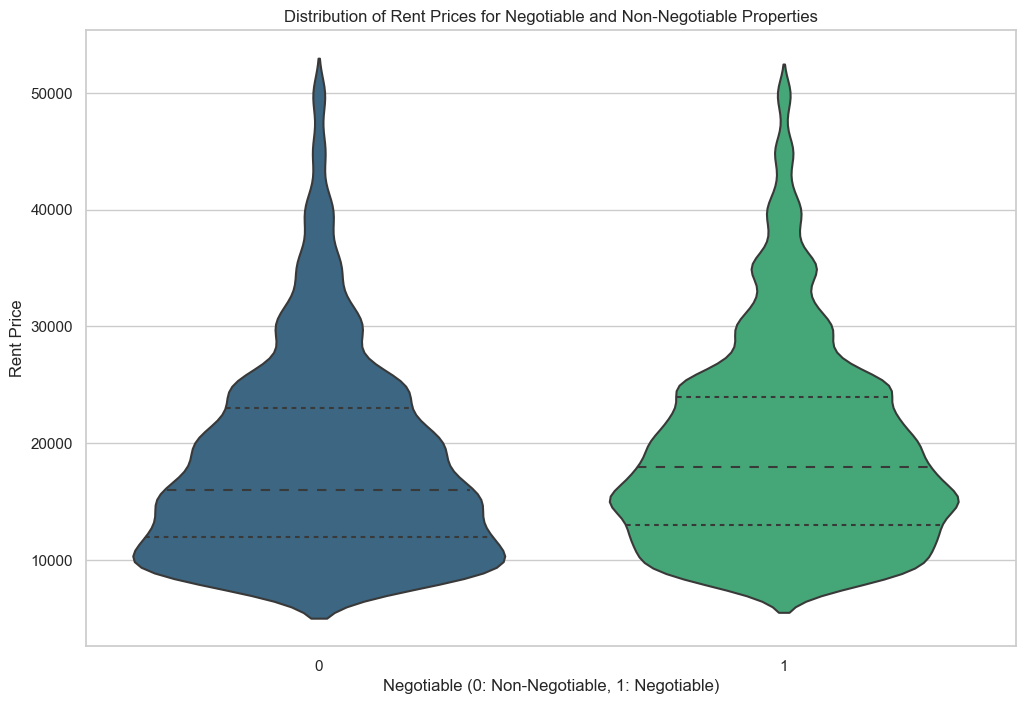

In [97]:
# Create a violin plot to compare rent prices for negotiable and non-negotiable properties
plt.figure(figsize=(12, 8))
sns.violinplot(x='negotiable', y='rent', data=df_train, palette='viridis', inner='quartile')
plt.title('Distribution of Rent Prices for Negotiable and Non-Negotiable Properties')
plt.xlabel('Negotiable (0: Non-Negotiable, 1: Negotiable)')
plt.ylabel('Rent Price')
plt.show()

# Lease Type and Rent

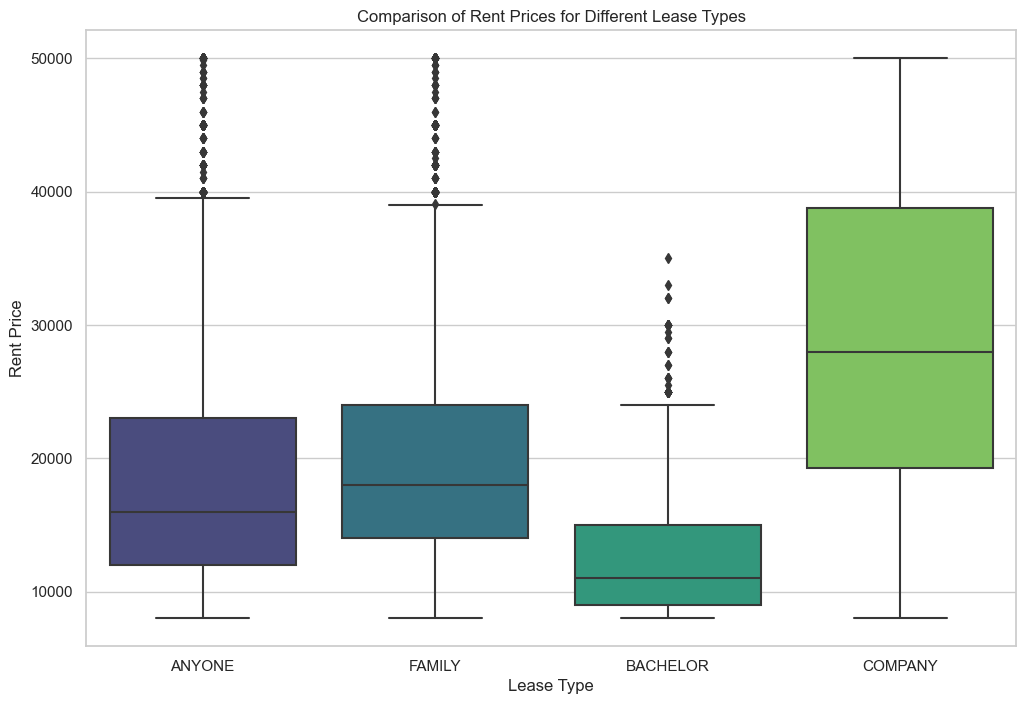

In [98]:
# Create a box plot to compare rent prices for different lease types
plt.figure(figsize=(12, 8))
sns.boxplot(x='lease_type', y='rent', data=df_train, palette='viridis')
plt.title('Comparison of Rent Prices for Different Lease Types')
plt.xlabel('Lease Type')
plt.ylabel('Rent Price')
plt.show()

In [99]:
summary_stats = df_train.groupby('lease_type')['rent'].describe()
print(summary_stats)

              count          mean           std     min      25%      50%  \
lease_type                                                                  
ANYONE       9550.0  18607.229424   8663.918363  8000.0  12000.0  16000.0   
BACHELOR      581.0  13099.881239   5781.555535  8000.0   9000.0  11000.0   
COMPANY        58.0  28546.551724  12260.809273  8000.0  19250.0  28000.0   
FAMILY      10036.0  19770.792447   8115.980960  8000.0  14000.0  18000.0   

                75%      max  
lease_type                    
ANYONE      23000.0  50000.0  
BACHELOR    15000.0  35000.0  
COMPANY     38750.0  50000.0  
FAMILY      24000.0  50000.0  


## Impact of Lease Types on Rent:

The analysis of different lease types reveals distinct trends and impacts on property rents:

- **ANYONE Lease Type:**
  - **Average Rent:** ₹18,607
  - **Observation:** Properties under the "ANYONE" lease type show a moderate average rent, with a considerable range from ₹8,000 to ₹50,000. This suggests a diverse spectrum of rental options suitable for a broad tenant base.

- **BACHELOR Lease Type:**
  - **Average Rent:** ₹13,100
  - **Observation:** The "BACHELOR" lease type tends to have lower average rents, signaling potential affordability for individuals or smaller households. The majority of rents fall within the range of ₹9,000 to ₹15,000.

- **COMPANY Lease Type:**
  - **Average Rent:** ₹28,547
  - **Observation:** Properties under the "COMPANY" lease type exhibit a higher average rent, indicating that these properties may cater to corporate housing needs. The rent range is broad, reaching up to ₹50,000, suggesting a wide variety of offerings.

- **FAMILY Lease Type:**
  - **Average Rent:** ₹19,771
  - **Observation:** The "FAMILY" lease type showcases a diverse distribution of rents, with the average around ₹18,000. This lease type provides a range of options suitable for family living, with rents extending up to ₹50,000.

In summary, the choice of lease type significantly influences the average rent, offering diverse options for tenants based on their preferences and requirements.


 # Balconies and Rent:

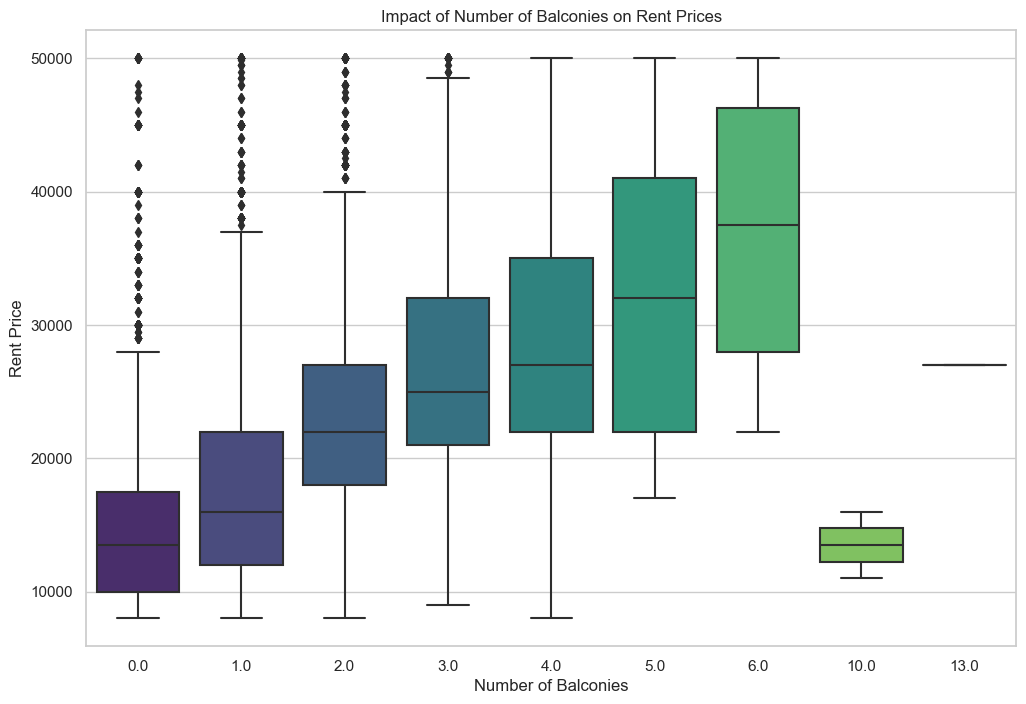

In [100]:
# Create a box plot for 'balconies' vs 'rent'
plt.figure(figsize=(12, 8))
sns.boxplot(x='balconies', y='rent', data=df_train, palette='viridis')
plt.title('Impact of Number of Balconies on Rent Prices')
plt.xlabel('Number of Balconies')
plt.ylabel('Rent Price')
plt.show()


In [101]:
summary_stats = df_train.groupby('balconies')['rent'].describe()
print(summary_stats)

            count          mean           std      min      25%      50%  \
balconies                                                                  
0.0        5822.0  14905.058056   6308.983475   8000.0  10000.0  13500.0   
1.0        7895.0  17560.572768   7464.100218   8000.0  12000.0  16000.0   
2.0        4608.0  23405.881076   7980.614385   8000.0  18000.0  22000.0   
3.0        1568.0  27110.762117   8200.152304   9000.0  21000.0  25000.0   
4.0         285.0  28601.754386   9026.086826   8000.0  22000.0  27000.0   
5.0          39.0  31730.769231  10447.768683  17000.0  22000.0  32000.0   
6.0           4.0  36750.000000  12996.794477  22000.0  28000.0  37500.0   
10.0          3.0  13500.000000   2500.000000  11000.0  12250.0  13500.0   
13.0          1.0  27000.000000           NaN  27000.0  27000.0  27000.0   

               75%      max  
balconies                    
0.0        17500.0  50000.0  
1.0        22000.0  50000.0  
2.0        27000.0  50000.0  
3.0        32

## Impact of Balconies on Rent:

The analysis of the number of balconies in properties reveals trends and impacts on rent:

- **0 Balconies:**
  - **Average Rent:** ₹14,905
  - **Observation:** Properties with no balconies exhibit a moderate average rent, ranging from ₹8,000 to ₹50,000. The majority of rents fall within the range of ₹10,000 to ₹17,500.

- **1 Balcony:**
  - **Average Rent:** ₹17,561
  - **Observation:** Properties with one balcony show a slightly higher average rent, ranging from ₹8,000 to ₹50,000. The majority of rents fall within the range of ₹12,000 to ₹22,000.

- **2 Balconies:**
  - **Average Rent:** ₹23,406
  - **Observation:** The average rent increases for properties with two balconies, indicating a potential preference for more outdoor space. Rents range from ₹8,000 to ₹50,000, with the majority falling within ₹18,000 to ₹27,000.

- **3 Balconies:**
  - **Average Rent:** ₹27,111
  - **Observation:** Properties with three balconies show a further increase in average rent, suggesting a premium for additional balcony spaces. Rents range from ₹9,000 to ₹50,000, with the majority falling within ₹21,000 to ₹32,000.

- **4 to 6 Balconies:**
  - **Average Rent:** ₹28,602 to ₹36,750
  - **Observation:** Properties with four to six balconies exhibit higher average rents, potentially due to the larger outdoor areas. Rents range from ₹8,000 to ₹50,000, with the majority falling within ₹22,000 to ₹35,000.

- **10 Balconies:**
  - **Average Rent:** ₹13,500
  - **Observation:** Properties with ten balconies show a lower average rent, potentially due to a specific property type or characteristics. The rent range is narrower, from ₹11,000 to ₹16,000.

- **13 Balconies:**
  - **Average Rent:** ₹27,000
  - **Observation:** Properties with thirteen balconies have a single data point, making it challenging to draw robust conclusions. The rent is ₹27,000.

## Other Observations:

- **Outliers:** Some propeties have balconies more than 6 . These could be potential outliers or specific property characteristics that need further investigation.

In summary, the number of balconies has a noticeable impact on property rents, with an increasing trend in average rent as the number of balconies increases. However, outliers in specific balcony categories may require additional scrutiny for accurate interpretation.


# Property Facing Vs Rent

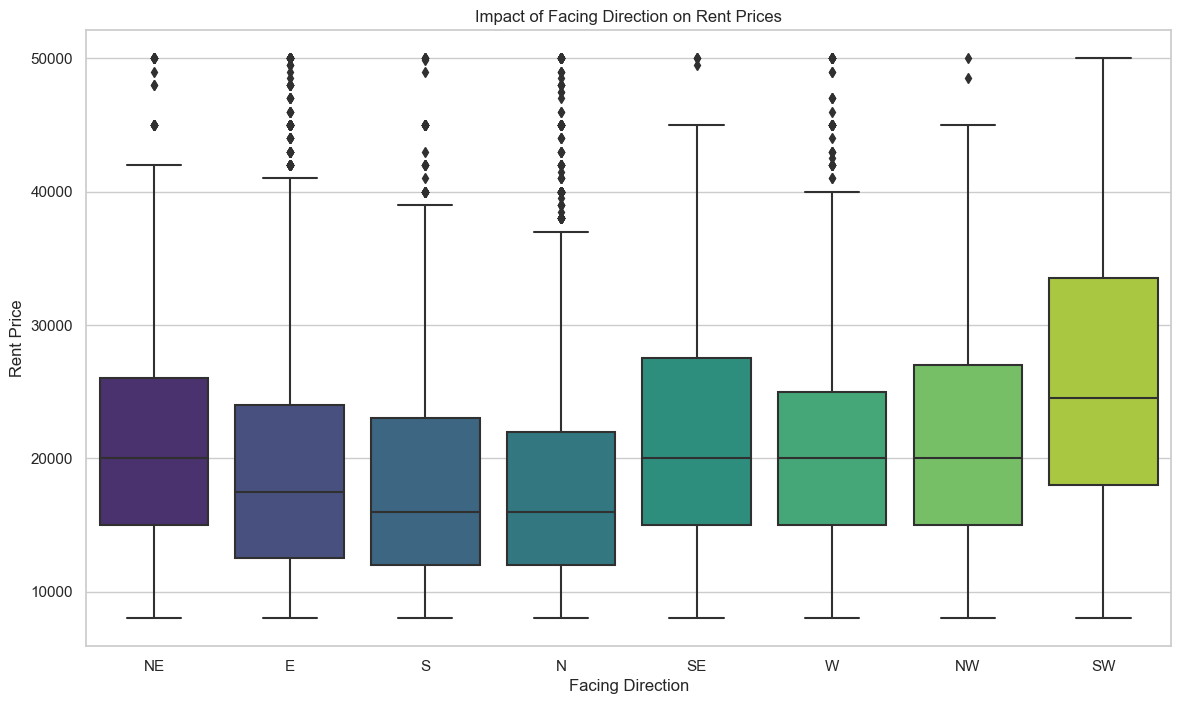

In [102]:
# Create a box plot for 'facing' vs 'rent'
plt.figure(figsize=(14, 8))
sns.boxplot(x='facing', y='rent', data=df_train, palette='viridis')
plt.title('Impact of Facing Direction on Rent Prices')
plt.xlabel('Facing Direction')
plt.ylabel('Rent Price')
plt.show()

In [103]:
summary_stats = df_train.groupby('facing')['rent'].describe()
print(summary_stats)

         count          mean          std     min      25%      50%      75%  \
facing                                                                         
E       9384.0  19048.942136  8313.228154  8000.0  12500.0  17500.0  24000.0   
N       5846.0  17960.106911  8264.341775  8000.0  12000.0  16000.0  22000.0   
NE       809.0  21674.964153  9339.508664  8000.0  15000.0  20000.0  26000.0   
NW       148.0  21908.783784  9143.236071  8000.0  15000.0  20000.0  27000.0   
S       1204.0  18524.127907  8588.788221  8000.0  12000.0  16000.0  23000.0   
SE       193.0  22021.979275  9991.630489  8000.0  15000.0  20000.0  27500.0   
SW        58.0  24896.551724  9943.594703  8000.0  18000.0  24500.0  33500.0   
W       2583.0  20464.788618  8155.200020  8000.0  15000.0  20000.0  25000.0   

            max  
facing           
E       50000.0  
N       50000.0  
NE      50000.0  
NW      50000.0  
S       50000.0  
SE      50000.0  
SW      50000.0  
W       50000.0  


## Comparative Analysis of Facing Directions on Rent:

The analysis of facing directions indicates distinct variations in rent prices, with specific observations for each direction:

### Average Rent Comparison:

- **East (E):** ₹19,048
- **North (N):** ₹17,960
- **North-East (NE):** ₹21,675
- **North-West (NW):** ₹21,909
- **South (S):** ₹18,524
- **South-East (SE):** ₹22,022
- **South-West (SW):** ₹24,897
- **West (W):** ₹20,465

### Observations:

1. **Higher Rent Premium:**
   - South-West (SW) and South-East (SE) facing directions command a premium in average rent compared to other directions.
   - South-West (SW): ₹24,897
   - South-East (SE): ₹22,022

2. **Moderate Rent Directions:**
   - East (E) and West (W) facing directions exhibit moderate average rents, falling between ₹19,048 and ₹20,465.

3. **Similar Average Rents:**
   - North (N) and South (S) facing directions have similar average rents, with values around ₹17,960 and ₹18,524, respectively.

4. **Premium for Diagonal Directions:**
   - North-East (NE) and North-West (NW) facing directions show a premium in average rent, with values around ₹21,675 and ₹21,909, respectively.

### Outliers and Variations:

- **Outliers:** South-West (SW) and South-East (SE) facing directions exhibit higher average rents and a wider rent range, potentially indicating specific property characteristics or preferences for these directions.

In conclusion, the comparative analysis reveals that facing direction significantly influences rent prices, with certain directions commanding a premium. It's essential to consider these variations while assessing property values and preferences in the real estate market.


# Amenities and Rent

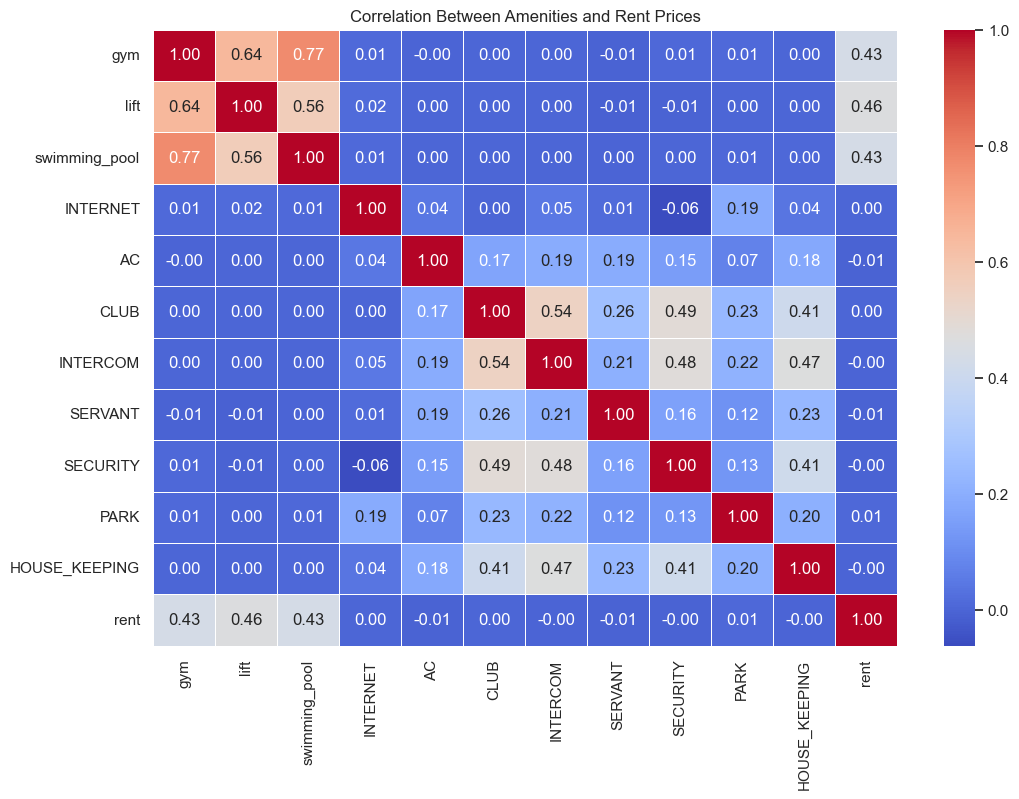

In [104]:
# Select amenities columns and rent column
amenities_columns = ['gym', 'lift', 'swimming_pool', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'SERVANT', 'SECURITY', 'PARK', 'HOUSE_KEEPING']
selected_columns = amenities_columns + ['rent']

# Create a new DataFrame with selected columns
amenities_df = df_train[selected_columns]

# Calculate the correlation matrix
correlation_matrix = amenities_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Amenities and Rent Prices')
plt.show()

# Correlation Analysis of Amenities and Rent Prices

## Based on the correlation coefficients, the following observations can be made:

### Strong Positive Correlation:

- **Gym, Lift, and Swimming Pool:** These amenities exhibit a strong positive correlation with rent prices. Properties with these amenities tend to command higher rents.
  
- **Club, Intercom, Security, and Park:** While positive, the correlations for these amenities are not as strong as the first three. However, they still contribute positively to rent prices.

### Weak Correlations:

- **Internet, AC, and Housekeeping:** These amenities have weak correlations with rent prices. While they may have some impact, it is not as pronounced as the amenities in the strong positive correlation category.

### Weak Negative Correlation:

- **Servant:** There is a weak negative correlation with rent prices for properties with a servant facility. This suggests that the presence of a servant facility might be associated with slightly lower rent prices.

## Inference:

From the analysis, it is apparent that amenities such as gym, lift, and swimming pool have a stronger positive impact on rent prices. Property seekers and landlords can consider these amenities as key factors influencing rental values. Additionally, while amenities like club, intercom, security, park, internet, AC, and housekeeping also positively contribute, their impact is comparatively weaker. Understanding these correlations can aid in making informed decisions when evaluating or offering rental properties.


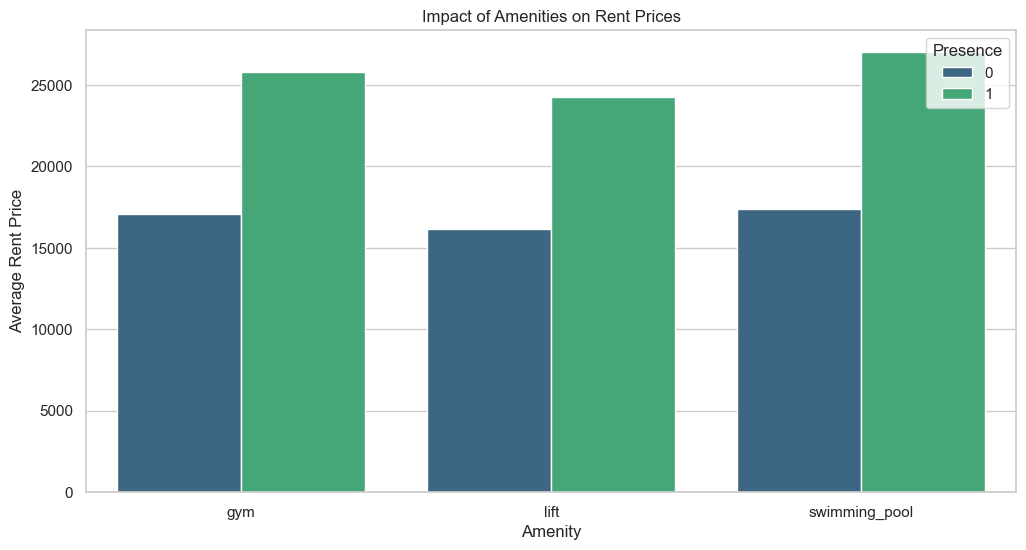

In [105]:
# List of amenities
amenities_columns = ['gym', 'swimming_pool','lift']

# Create a DataFrame with amenity columns and rent
amenities_rent_df = df_train[amenities_columns + ['rent']]

# Melt the DataFrame to have a column for presence of amenities
melted_df = pd.melt(amenities_rent_df, id_vars='rent', var_name='amenity', value_name='presence')

# Calculate average rent prices for properties with and without each amenity
average_rent_by_amenity = melted_df.groupby(['amenity', 'presence']).mean().reset_index()

# Plot bar plots for each amenity
plt.figure(figsize=(12, 6))
sns.barplot(x='amenity', y='rent', hue='presence', data=average_rent_by_amenity, palette='viridis')
plt.title('Impact of Amenities on Rent Prices')
plt.xlabel('Amenity')
plt.ylabel('Average Rent Price')
plt.legend(title='Presence', loc='upper right')
plt.show()

## Observation:

The presence of gym, swimming pool, and lift has a significant  impact on the average rent of the property. Properties equipped with these amenities tend to command higher average rents. This observation highlights the importance of amenities in influencing rental prices, with these specific features contributing positively to the overall value and desirability of the property.


# Water Supply and Building Type

In [106]:
summary_stats = df_train.groupby('water_supply')['rent'].describe()
print(summary_stats)

                count          mean          std     min      25%      50%  \
water_supply                                                                 
BOREWELL       3049.0  20937.576582  7983.506529  8000.0  15000.0  20000.0   
CORPORATION    6639.0  17615.673445  8158.487535  8000.0  12000.0  15500.0   
CORP_BORE     10537.0  19416.942014  8585.296948  8000.0  13000.0  18000.0   

                  75%      max  
water_supply                    
BOREWELL      25000.0  50000.0  
CORPORATION   22000.0  50000.0  
CORP_BORE     24000.0  50000.0  


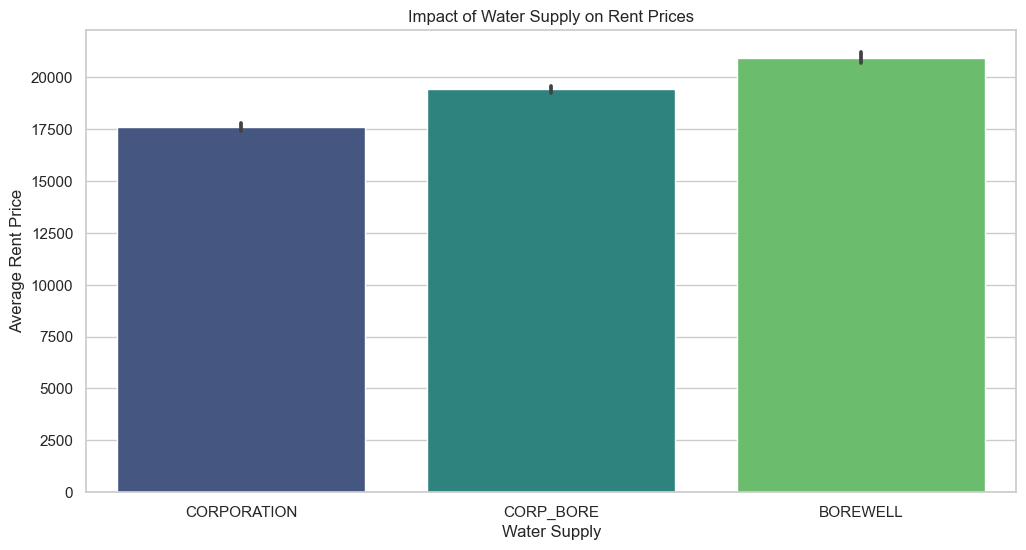

In [107]:
# Create a DataFrame with water supply and rent
water_supply_rent_df = df_train[['water_supply', 'rent']]

# Plot bar plot for average rent prices based on water supply
plt.figure(figsize=(12, 6))
sns.barplot(x='water_supply', y='rent', data=water_supply_rent_df, palette='viridis')
plt.title('Impact of Water Supply on Rent Prices')
plt.xlabel('Water Supply')
plt.ylabel('Average Rent Price')
plt.show()

## Observation:

The mean rent prices based on different water supply sources are as follows:

- Borewell: ₹20,937.58
- Corporation: ₹17,615.67
- Corporation and Borewell: ₹19,416.94

This suggests that properties with a water supply from Borewell tend to have a higher average rent compared to those with Corporation or both Corporation and Borewell. The choice of water supply source can contribute to variations in rent prices, and tenants may consider this factor while making rental decisions.


# Building Type vs Rent

In [108]:
df_train['building_type'].unique()


array(['AP', 'IH', 'IF', 'GC'], dtype=object)

In [109]:
summary_stats = df_train.groupby('building_type')['rent'].describe()
print(summary_stats)

                count          mean           std     min      25%      50%  \
building_type                                                                 
AP             8732.0  23374.027371   8044.392556  8000.0  18000.0  22000.0   
GC               17.0  27852.941176  16921.477390  8000.0  10000.0  32000.0   
IF             9122.0  15104.153694   6379.410727  8000.0  10500.0  14000.0   
IH             2354.0  18279.459643   8982.075212  8000.0  12000.0  16000.0   

                   75%      max  
building_type                    
AP             27500.0  50000.0  
GC             44000.0  50000.0  
IF             18000.0  50000.0  
IH             22000.0  50000.0  


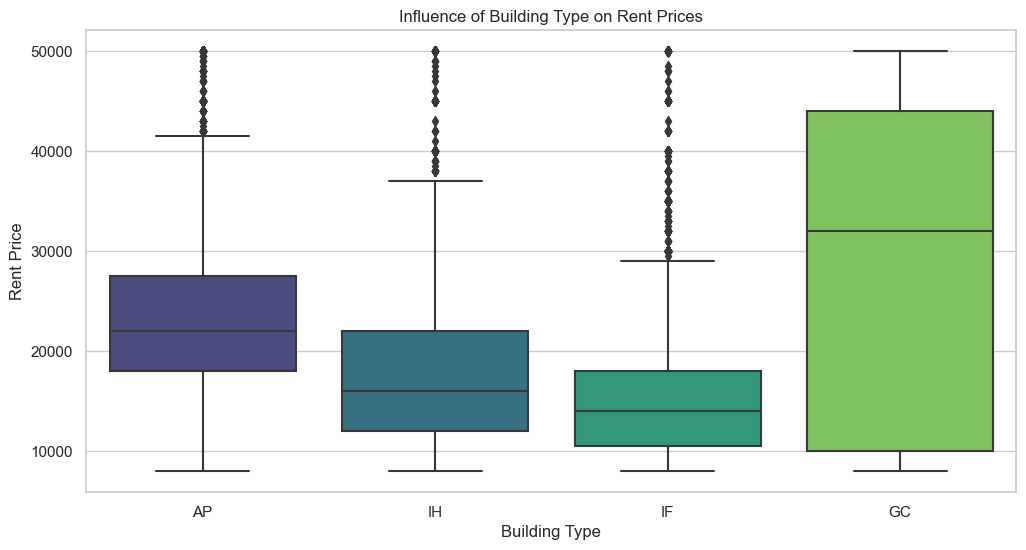

In [110]:
# Create a DataFrame with building type and rent
building_type_rent_df = df_train[['building_type', 'rent']]

# Plot box plot or violin plot for rent prices based on building type
plt.figure(figsize=(12, 6))
sns.boxplot(x='building_type', y='rent', data=building_type_rent_df, palette='viridis')
plt.title('Influence of Building Type on Rent Prices')
plt.xlabel('Building Type')
plt.ylabel('Rent Price')
plt.show()

## Observation:

The mean rent prices based on different building types are as follows:

-  (AP): ₹23,374.03
-  (GC): ₹27,852.94
-  (IF): ₹15,104.15
-  (IH): ₹18,279.46

 (AP) have the highest average rent, followed by s (GC),  (IH), and s (IF). This suggests that the type of building significantly influences the rent, with apartments generally commanding higher rents compared to other building types. Potential tenants may consider their preferences and budget constraints while choosing the type of building for rent.


# Handling Outliers 

In [111]:
df_train.isnull().sum()

type             0
latitude         0
longitude        0
lease_type       0
gym              0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
floor            0
total_floor      0
water_supply     0
building_type    0
balconies        0
rent             0
INTERNET         0
AC               0
CLUB             0
INTERCOM         0
SERVANT          0
SECURITY         0
PARK             0
HOUSE_KEEPING    0
dtype: int64

In [112]:
df_train[df_train.duplicated()]

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING
activation_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [113]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Columns to check for outliers
columns_to_check = ['latitude', 'longitude', 'property_size', 'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent']

# Detect outliers for each column
outliers_iqr = df_train[columns_to_check].apply(detect_outliers_iqr)

# Display the count of outliers for each column
outliers_iqr.sum()


latitude            0
longitude          23
property_size     466
property_age      297
bathroom          321
cup_board         337
floor            2473
total_floor      1806
balconies           8
rent              406
dtype: int64

In [114]:
# Filter the dataframe to show rows with outliers detected using IQR
outliers_iqr_data = df_train[outliers_iqr.any(axis=1)]
outliers_iqr_data


,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING
activation_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-06,BHK3,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,0,0,0,0,0,0,0,0
2018-05-31,BHK3,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,0,0,1,0,0,1,0,0
2018-12-07,BHK3,12.967144,77.750662,ANYONE,1,1,1,1,FULLY_FURNISHED,BOTH,1895,5.0,3.0,NE,5.0,3.0,9.0,CORPORATION,AP,3.0,32000.0,0,0,0,0,0,0,0,0
2017-09-10,BHK2,12.989002,77.727370,FAMILY,1,1,1,0,SEMI_FURNISHED,FOUR_WHEELER,1418,4.0,2.0,E,2.0,11.0,14.0,CORP_BORE,AP,2.0,32500.0,1,0,0,0,0,0,1,0
2017-12-15,BHK2,12.900570,77.707885,FAMILY,0,0,0,0,SEMI_FURNISHED,BOTH,1020,0.0,2.0,SE,2.0,4.0,15.0,CORPORATION,AP,2.0,22000.0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-09,BHK2,12.972928,77.714470,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1359,4.0,2.0,E,2.0,6.0,9.0,CORP_BORE,AP,2.0,29000.0,0,0,1,1,0,1,0,0
2017-10-15,BHK3,12.912012,77.680807,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,2000,0.0,4.0,N,3.0,1.0,4.0,CORPORATION,IF,2.0,39500.0,1,0,0,0,0,0,0,0
2018-07-31,BHK1,12.901106,77.638798,ANYONE,0,0,0,0,SEMI_FURNISHED,BOTH,550,0.0,1.0,S,1.0,4.0,4.0,CORPORATION,AP,1.0,12000.0,1,0,0,0,0,0,0,0


In [115]:
from scipy.stats import zscore

# Function to detect outliers using Z-Score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(zscore(data))
    outliers = (z_scores > threshold)
    return outliers

# Detect outliers for each column
outliers_zscore = df_train[columns_to_check].apply(detect_outliers_zscore)

# Display the count of outliers for each column
outliers_zscore.sum()


latitude           0
longitude         22
property_size     93
property_age     293
bathroom         321
cup_board          1
floor            508
total_floor      655
balconies         47
rent             307
dtype: int64

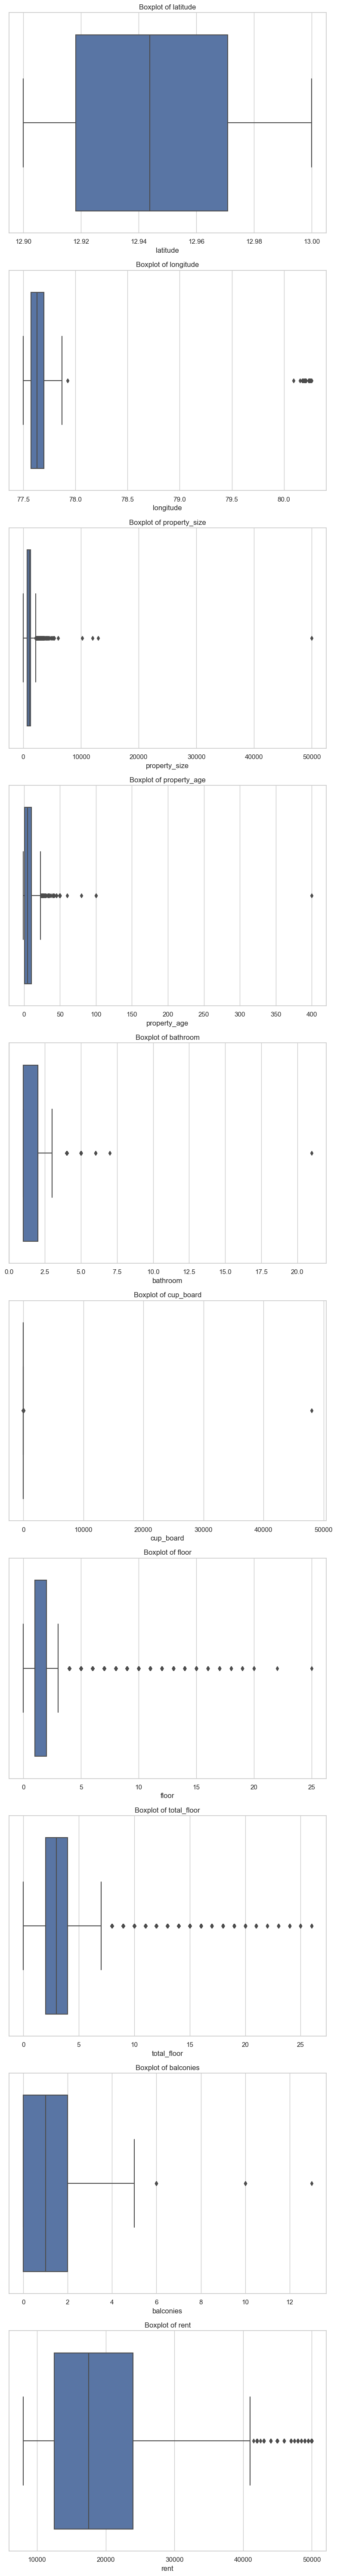

In [116]:
# Numerical features in  DataFrame
numerical_features = ['latitude', 'longitude', 'property_size', 'property_age', 'bathroom', 'cup_board', 'floor',
                       'total_floor', 'balconies', 'rent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 6 * len(numerical_features)))

# Plot box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df_train[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

## Observations on Outliers Handling:

**Latitude and Longitude:**
- Latitude does not have outliers.
- Longitude outliers are present, but they are crucial for locating the property, so they will be retained.

**Property Size:**
- Property size cannot be zero, so properties with sizes less than 100 or greater than 8000 are considered outliers and will be removed.

**Property Age:**
- Property age cannot be negative, and properties older than 50 years are considered outliers and will be removed.

**Bathrooms:**
- Properties with more than 7 bathrooms are considered outliers and will be removed.

**Cupboard:**
- Cupboard has a value of 48026; for other properties, cupboards are likely present based on the property type.

**Floor and Total Floor:**
- Floor and total floor represent the property's floor levels and the total number of floors, respectively. They are not outliers; hence, they will be retained.

**Balconies:**
- It is highly unlikely for a property to have more than 6 balconies. Properties with more than 6 balconies are considered outliers and will be removed.

**Rent:**
- Rent values will not be considered as outliers since the cost of a property depends on various factors like location, amenities, and features.


In [117]:
# Function to remove outliers based on specific criteria for each column
def remove_outliers(df):
    # Property Size
    df = df[(df['property_size'] >= 100) & (df['property_size'] <= 8000)]

    # Property Age
    df = df[df['property_age'] >= 0]
    df = df[df['property_age'] <= 50]

    # Bathrooms
    df = df[df['bathroom'] <= 7]

    # Cupboard
    df = df[df['cup_board'] != 48026]

    # Balconies
    df = df[df['balconies'] <= 6]

    return df

# Remove outliers from the dataframe
df_cleaned = remove_outliers(df_train)

# Display the shape of the cleaned dataframe
print("Shape of cleaned dataframe:", df_cleaned.shape)


Shape of cleaned dataframe: (20167, 29)


In [118]:
print(df_cleaned['rent'].describe())

count    20167.000000
mean     19057.789706
std       8433.148339
min       8000.000000
25%      12500.000000
50%      17500.000000
75%      24000.000000
max      50000.000000
Name: rent, dtype: float64


In [119]:
print(df_cleaned.describe())

           latitude     longitude           gym          lift  swimming_pool  \
count  20167.000000  20167.000000  20167.000000  20167.000000   20167.000000   
mean      12.945750     77.637359      0.227153      0.361630       0.175435   
std        0.029579      0.111111      0.419003      0.480484       0.380348   
min       12.900004     77.500072      0.000000      0.000000       0.000000   
25%       12.918258     77.572063      0.000000      0.000000       0.000000   
50%       12.943788     77.633547      0.000000      0.000000       0.000000   
75%       12.970910     77.695786      0.000000      1.000000       0.000000   
max       12.999999     80.266346      1.000000      1.000000       1.000000   

         negotiable  property_size  property_age      bathroom     cup_board  \
count  20167.000000   20167.000000  20167.000000  20167.000000  20167.000000   
mean       0.710914    1058.648485      5.750483      1.858234      2.213368   
std        0.453349     463.625941     

# Encoding of Categorial Features

In [120]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20167 entries, 2017-09-10 to 2018-03-03
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20167 non-null  object 
 1   latitude       20167 non-null  float64
 2   longitude      20167 non-null  float64
 3   lease_type     20167 non-null  object 
 4   gym            20167 non-null  int64  
 5   lift           20167 non-null  int64  
 6   swimming_pool  20167 non-null  int64  
 7   negotiable     20167 non-null  int64  
 8   furnishing     20167 non-null  object 
 9   parking        20167 non-null  object 
 10  property_size  20167 non-null  int64  
 11  property_age   20167 non-null  float64
 12  bathroom       20167 non-null  float64
 13  facing         20167 non-null  object 
 14  cup_board      20167 non-null  float64
 15  floor          20167 non-null  float64
 16  total_floor    20167 non-null  float64
 17  water_supply   20167 non-null  ob

In [121]:
df_cleaned["building_type"].unique()

array(['AP', 'IH', 'IF', 'GC'], dtype=object)

In [122]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20167 entries, 2017-09-10 to 2018-03-03
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20167 non-null  object 
 1   latitude       20167 non-null  float64
 2   longitude      20167 non-null  float64
 3   lease_type     20167 non-null  object 
 4   gym            20167 non-null  int64  
 5   lift           20167 non-null  int64  
 6   swimming_pool  20167 non-null  int64  
 7   negotiable     20167 non-null  int64  
 8   furnishing     20167 non-null  object 
 9   parking        20167 non-null  object 
 10  property_size  20167 non-null  int64  
 11  property_age   20167 non-null  float64
 12  bathroom       20167 non-null  float64
 13  facing         20167 non-null  object 
 14  cup_board      20167 non-null  float64
 15  floor          20167 non-null  float64
 16  total_floor    20167 non-null  float64
 17  water_supply   20167 non-null  ob

In [123]:
# Label encoding for 'type'
type_encoding = {
    'RK1': 0,
    'BHK1': 1,
    'BHK2': 2,
    'BHK3': 3,
    'BHK4': 4,
    'BHK4PLUS': 5
}

# Label encoding for 'lease_type'
lease_type_encoding = {
    'ANYONE': 1,
    'FAMILY': 2,
    'BACHELOR': 0,
    'COMPANY': 3
}

# Label encoding for 'furnishing'
furnishing_encoding = {
    'NOT_FURNISHED': 0,
    'SEMI_FURNISHED': 1,
    'FULLY_FURNISHED': 2
}

# Label encoding for 'parking'
parking_encoding = {
    'TWO_WHEELER': 0,
    'NONE': 1,
    'FOUR_WHEELER': 2,
    'BOTH': 3
}

# Label encoding for 'facing'
facing_encoding = {
    'N': 0,
    'E': 1,
    'W': 2,
    'NE': 3,
    'NW': 4,
    'S': 5,
    'SE': 6,
    'SW': 7
}

# Label encoding for 'water_supply'
water_supply_encoding = {
    'CORPORATION': 0,
    'CORP_BORE': 1,
    'BOREWELL': 2
}

# Label encoding for 'building_type'
building_type_encoding = {
    'IF': 0,
    'IH': 1,
    'AP': 2,
    'GC': 3
}

# Apply label encoding to your DataFrame
df_cleaned['type'] = df_cleaned['type'].map(type_encoding).astype('int64')
df_cleaned['lease_type'] = df_cleaned['lease_type'].map(lease_type_encoding).astype('int64')
df_cleaned['furnishing'] = df_cleaned['furnishing'].map(furnishing_encoding).astype('int64')
df_cleaned['parking'] = df_cleaned['parking'].map(parking_encoding).astype('int64')
df_cleaned['facing'] = df_cleaned['facing'].map(facing_encoding).astype('int64')
df_cleaned['water_supply'] = df_cleaned['water_supply'].map(water_supply_encoding).astype('int64')
df_cleaned['building_type'] = df_cleaned['building_type'].map(building_type_encoding).astype('int64')


In [124]:
# Convert datetime index to separate date-related features
df_cleaned['day'] = df_cleaned.index.day
df_cleaned['month'] = df_cleaned.index.month
df_cleaned['year'] = df_cleaned.index.year

In [125]:
df_cleaned.head()

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING,day,month,year
activation_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-09-10,2,12.929557,77.672280,1,0,1,0,1,1,3,1400,4.0,2.0,3,2.0,3.0,4.0,0,2,2.0,22000.0,0,0,0,0,0,0,1,0,10,9,2017
2018-12-06,3,12.982870,80.262012,2,0,1,0,0,1,3,1350,6.0,3.0,1,3.0,1.0,5.0,1,2,3.0,28000.0,0,0,0,0,0,0,0,0,6,12,2018
2018-07-20,1,12.955991,77.531634,2,0,0,0,1,1,0,600,3.0,1.0,1,1.0,1.0,2.0,0,1,0.0,8000.0,0,0,0,0,0,0,1,0,20,7,2018
2018-05-31,3,12.963903,77.649446,2,0,0,0,1,1,3,1500,15.0,3.0,1,4.0,0.0,0.0,0,1,1.0,45000.0,0,0,1,0,0,1,0,0,31,5,2018
2017-10-24,1,12.986196,77.718314,2,1,1,1,1,1,3,1080,0.0,2.0,1,1.0,3.0,5.0,1,2,2.0,18000.0,1,1,1,1,1,1,1,1,24,10,2017


In [126]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20167 entries, 2017-09-10 to 2018-03-03
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20167 non-null  int64  
 1   latitude       20167 non-null  float64
 2   longitude      20167 non-null  float64
 3   lease_type     20167 non-null  int64  
 4   gym            20167 non-null  int64  
 5   lift           20167 non-null  int64  
 6   swimming_pool  20167 non-null  int64  
 7   negotiable     20167 non-null  int64  
 8   furnishing     20167 non-null  int64  
 9   parking        20167 non-null  int64  
 10  property_size  20167 non-null  int64  
 11  property_age   20167 non-null  float64
 12  bathroom       20167 non-null  float64
 13  facing         20167 non-null  int64  
 14  cup_board      20167 non-null  float64
 15  floor          20167 non-null  float64
 16  total_floor    20167 non-null  float64
 17  water_supply   20167 non-null  in

                   type  latitude  longitude  lease_type       gym      lift  \
type           1.000000 -0.004621   0.015473    0.219158  0.273942  0.313904   
latitude      -0.004621  1.000000   0.193643   -0.000392  0.035142  0.018528   
longitude      0.015473  0.193643   1.000000   -0.041402  0.244753  0.207662   
lease_type     0.219158 -0.000392  -0.041402    1.000000  0.065653  0.092993   
gym            0.273942  0.035142   0.244753    0.065653  1.000000  0.644934   
lift           0.313904  0.018528   0.207662    0.092993  0.644934  1.000000   
swimming_pool  0.267417  0.033334   0.228420    0.061268  0.769910  0.565087   
negotiable     0.077810 -0.010472  -0.023815   -0.022108  0.009477  0.012135   
furnishing     0.093862 -0.011506   0.073236   -0.017586  0.158495  0.196205   
parking        0.411810  0.009748   0.159125    0.125858  0.391538  0.523800   
property_size  0.769681  0.010311   0.093615    0.187255  0.374174  0.396357   
property_age   0.036113  0.032304  -0.15

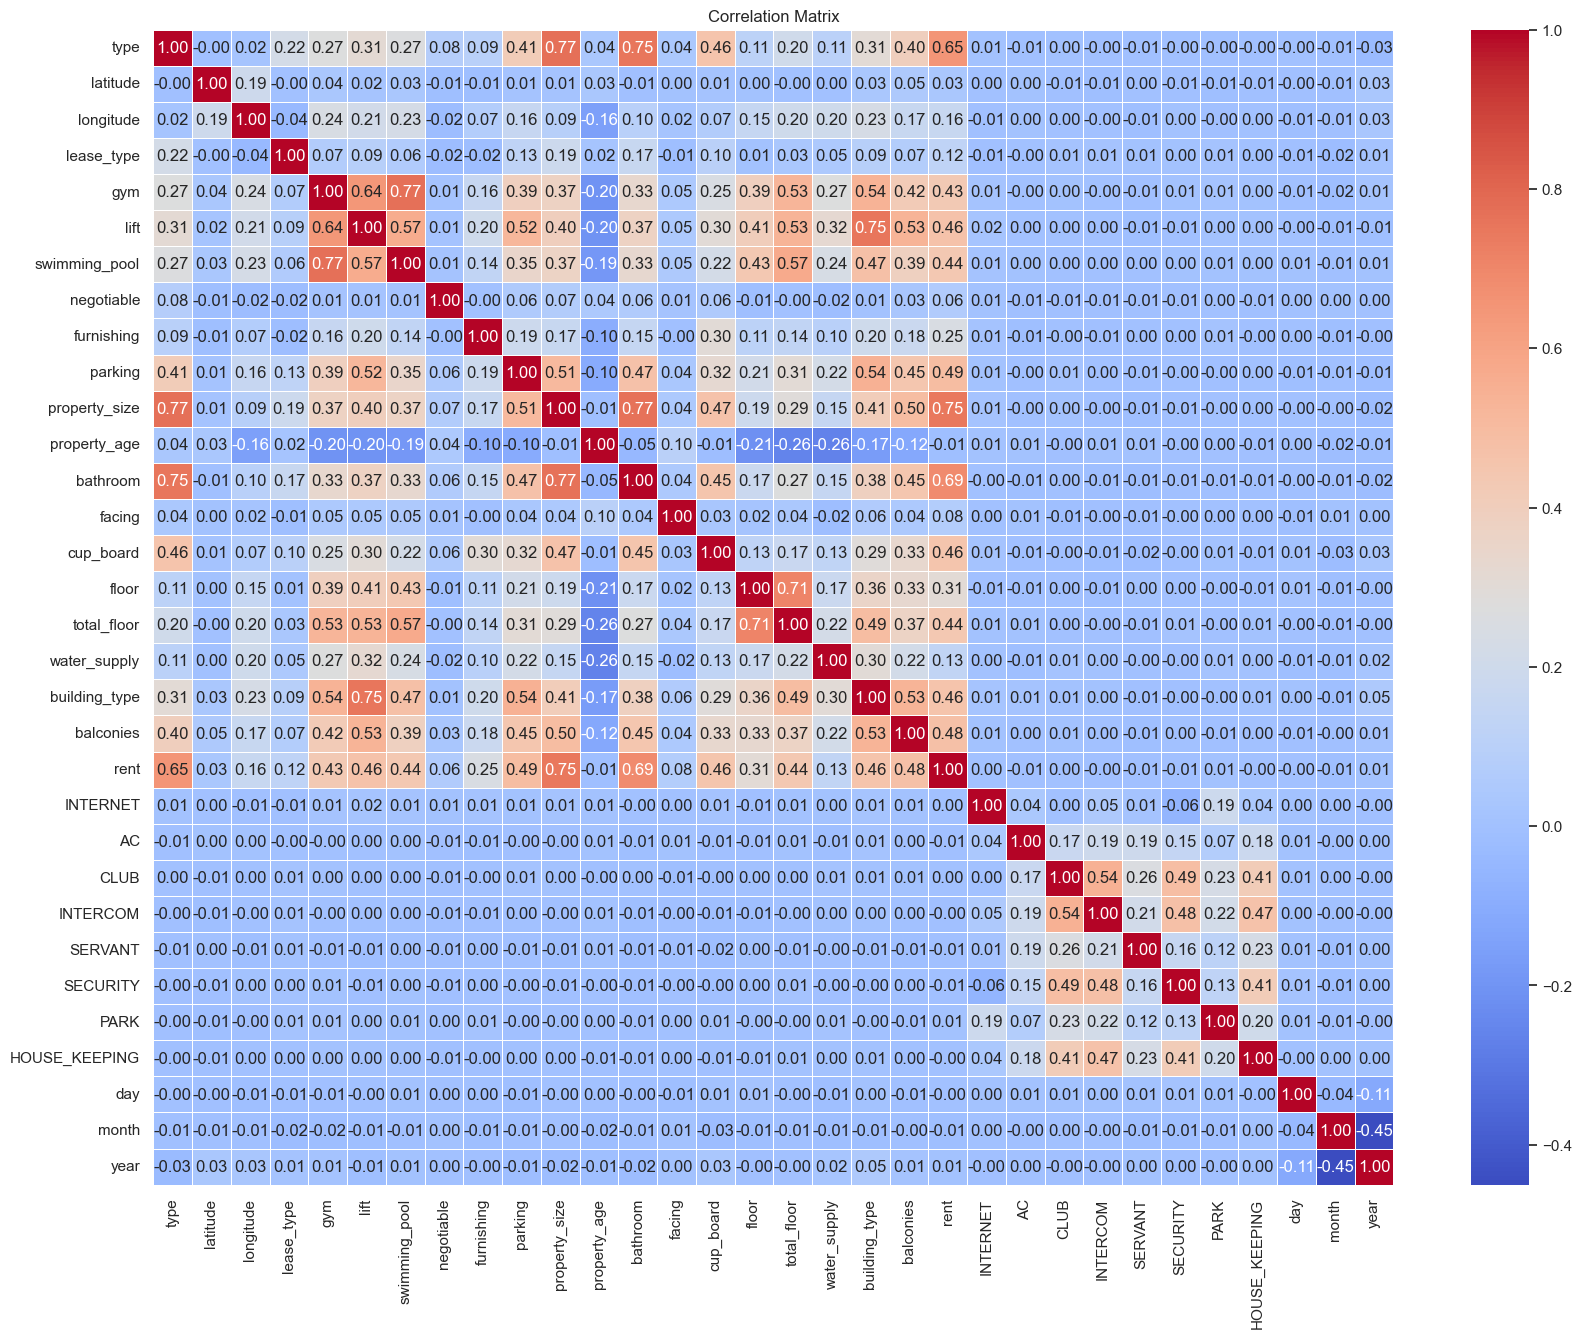

In [127]:
# Calculate correlation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



In [128]:
print(df_cleaned.describe())

               type      latitude     longitude    lease_type           gym  \
count  20167.000000  20167.000000  20167.000000  20167.000000  20167.000000   
mean       2.012694     12.945750     77.637359      1.473248      0.227153   
std        0.746467      0.029579      0.111111      0.558904      0.419003   
min        0.000000     12.900004     77.500072      0.000000      0.000000   
25%        2.000000     12.918258     77.572063      1.000000      0.000000   
50%        2.000000     12.943788     77.633547      1.000000      0.000000   
75%        2.000000     12.970910     77.695786      2.000000      0.000000   
max        5.000000     12.999999     80.266346      3.000000      1.000000   

               lift  swimming_pool    negotiable    furnishing       parking  \
count  20167.000000   20167.000000  20167.000000  20167.000000  20167.000000   
mean       0.361630       0.175435      0.710914      0.987802      1.771310   
std        0.480484       0.380348      0.453349

In [129]:
df_cleaned.head()

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING,day,month,year
activation_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-09-10,2,12.929557,77.672280,1,0,1,0,1,1,3,1400,4.0,2.0,3,2.0,3.0,4.0,0,2,2.0,22000.0,0,0,0,0,0,0,1,0,10,9,2017
2018-12-06,3,12.982870,80.262012,2,0,1,0,0,1,3,1350,6.0,3.0,1,3.0,1.0,5.0,1,2,3.0,28000.0,0,0,0,0,0,0,0,0,6,12,2018
2018-07-20,1,12.955991,77.531634,2,0,0,0,1,1,0,600,3.0,1.0,1,1.0,1.0,2.0,0,1,0.0,8000.0,0,0,0,0,0,0,1,0,20,7,2018
2018-05-31,3,12.963903,77.649446,2,0,0,0,1,1,3,1500,15.0,3.0,1,4.0,0.0,0.0,0,1,1.0,45000.0,0,0,1,0,0,1,0,0,31,5,2018
2017-10-24,1,12.986196,77.718314,2,1,1,1,1,1,3,1080,0.0,2.0,1,1.0,3.0,5.0,1,2,2.0,18000.0,1,1,1,1,1,1,1,1,24,10,2017


# Spliting the dataset to Train,Validate and Test set for modle building(Training,Validating,Testing)

In [130]:
from sklearn.model_selection import train_test_split


# Assuming df_cleaned is your DataFrame and 'rent' is the target variable
X = df_cleaned.drop('rent', axis=1)  # Features (excluding 'rent')
y = df_cleaned['rent']  # Target variable

# Split the data into training (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [131]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical features to be scaled
numerical_features = ['latitude', 'longitude', 'property_size', 'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'day', 'month', 'year']

# Apply Min-Max scaling to numerical features
scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



# Spliting the dataset to Train,Validate and Test set for modle building(Training,Validating,Testing)

In [138]:
from sklearn.model_selection import train_test_split


# Assuming df_cleaned is your DataFrame and 'rent' is the target variable
X = df_cleaned.drop('rent', axis=1)  # Features (excluding 'rent')
y = df_cleaned['rent']  # Target variable

# Split the data into training (80%) and temporary set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation (50%) and test sets (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [136]:
import pickle


# Save the MinMaxScaler to a file
with open('minmax_scaler_1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [134]:
X_train

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING,day,month,year
activation_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-09-18,3,0.163082,0.020898,2,0,0,0,0,1,3,0.235690,0.20,0.166667,1,0.050,0.00,0.038462,1,1,0.000000,1,0,0,1,0,1,1,1,0.566667,0.727273,0.0
2017-11-11,2,0.047011,0.035937,2,0,1,0,0,1,3,0.185185,0.28,0.166667,1,0.050,0.00,0.115385,0,2,0.166667,1,0,0,0,0,1,1,0,0.333333,0.909091,0.0
2018-04-03,2,0.584101,0.089688,2,1,1,1,1,1,3,0.185185,0.10,0.166667,1,0.050,0.04,0.269231,0,2,0.333333,0,0,0,0,0,0,0,0,0.066667,0.272727,1.0
2018-10-05,1,0.565961,0.041866,1,0,0,0,1,1,0,0.067340,0.40,0.000000,1,0.025,0.08,0.115385,0,2,0.000000,1,0,1,0,0,1,1,0,0.133333,0.818182,1.0
2018-02-03,2,0.523200,0.024292,1,0,0,0,1,1,0,0.134680,0.30,0.166667,5,0.050,0.04,0.038462,0,0,0.166667,1,0,0,0,0,0,1,0,0.066667,0.090909,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-11,2,0.497057,0.073248,2,0,0,0,1,1,3,0.168350,0.10,0.166667,2,0.050,0.08,0.192308,0,0,0.166667,1,1,1,1,1,1,1,1,0.333333,0.181818,0.0
2018-06-22,2,0.931230,0.011646,2,0,0,0,0,1,0,0.185185,0.20,0.000000,0,0.025,0.00,0.038462,0,0,0.000000,1,0,0,0,0,1,0,0,0.700000,0.454545,1.0
2017-10-07,1,0.272665,0.039417,2,0,0,0,0,1,0,0.050505,0.00,0.000000,1,0.025,0.00,0.076923,1,0,0.000000,1,0,1,0,0,1,1,1,0.200000,0.818182,0.0


In [135]:
X_test

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,PARK,HOUSE_KEEPING,day,month,year
activation_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-15,2,0.484618,0.014322,2,0,0,0,1,1,3,0.143098,0.08,0.166667,0,0.050,0.08,0.076923,1,0,0.166667,0,0,0,0,0,1,1,0,0.466667,0.454545,1.0
2018-05-07,2,0.904976,0.093746,2,0,1,0,0,1,3,0.181818,0.06,0.166667,1,0.150,0.08,0.192308,1,2,0.500000,1,0,0,0,0,0,0,0,0.200000,0.363636,1.0
2017-11-12,2,0.651079,0.048534,1,0,0,0,1,1,0,0.104377,0.12,0.000000,1,0.050,0.12,0.115385,1,0,0.000000,1,0,0,0,0,0,0,0,0.366667,0.909091,0.0
2018-07-18,2,0.058414,0.034468,1,0,0,0,1,1,0,0.109428,0.20,0.000000,2,0.025,0.00,0.038462,0,1,0.000000,1,1,1,1,0,1,1,1,0.566667,0.545455,1.0
2018-07-07,1,0.606236,0.050031,3,0,0,0,1,0,2,0.050505,0.20,0.000000,1,0.000,0.00,0.038462,0,1,0.000000,1,0,0,0,1,0,1,1,0.200000,0.545455,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,1,0.080661,0.038215,2,0,0,0,0,1,0,0.058923,0.06,0.000000,0,0.025,0.12,0.115385,0,0,0.333333,1,0,0,0,0,0,0,0,0.966667,0.000000,1.0
2018-05-18,3,0.180767,0.021435,2,0,0,0,1,1,3,0.319865,0.00,0.166667,0,0.075,0.00,0.076923,0,1,0.166667,1,0,1,1,1,1,1,1,0.566667,0.363636,1.0
2018-06-04,1,0.708495,0.039652,2,0,0,0,0,1,0,0.084175,0.16,0.000000,1,0.025,0.08,0.115385,0,2,0.166667,1,0,0,0,0,0,0,0,0.100000,0.454545,1.0


# Model Buidling

In [160]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from lightgbm import LGBMRegressor

In [161]:

# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Lgb' : LGBMRegressor()
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\n{name} Model Evaluation:")
    print("Training RMSE:", train_rmse)
    print("Testing RMSE:", test_rmse)
    print("Training MAE:", train_mae)
    print("Testing MAE:", test_mae)
    print("Training R^2 Score:", train_r2)
    print("Testing R^2 Score:", test_r2)
    print("------------------------------------------------------\n")

Training Linear Regression...

Linear Regression Model Evaluation:
Training RMSE: 4760.951336912685
Testing RMSE: 5018.477100634381
Training MAE: 3514.748136864907
Testing MAE: 3594.8517129467173
Training R^2 Score: 0.6800222006168215
Testing R^2 Score: 0.6511375558360664
------------------------------------------------------

Training Ridge Regression...

Ridge Regression Model Evaluation:
Training RMSE: 4761.323833238034
Testing RMSE: 5015.818701426853
Training MAE: 3516.1891503257575
Testing MAE: 3596.2889454777755
Training R^2 Score: 0.6799721286002194
Testing R^2 Score: 0.6515070583724483
------------------------------------------------------

Training Lasso Regression...

Lasso Regression Model Evaluation:
Training RMSE: 4761.178112899761
Testing RMSE: 5016.468810603356
Training MAE: 3515.7531702941615
Testing MAE: 3594.6758468674248
Training R^2 Score: 0.6799917172094739
Testing R^2 Score: 0.65141671493896
------------------------------------------------------

Training Decision

## Model Evaluation and Inference

### Linear Regression, Ridge Regression, and Lasso Regression:
- **Inference**: These linear models demonstrate stable performance across training and testing datasets. However, their metrics are relatively lower compared to more complex models.
- **Evaluation**: They seem to achieve a balanced fit, but there is a risk of underfitting due to their simplicity.

### Decision Tree:
- **Inference**: The Decision Tree model perfectly fits the training data but performs poorly on the testing data, suggesting overfitting.
- **Evaluation**: There is clear evidence of overfitting, indicating a lack of generalization to unseen data.

### Random Forest, Gradient Boosting, XGBoost, AdaBoost, and LightGBM:
- **Inference**: These ensemble methods generally exhibit strong performance across both training and testing datasets.
- **Evaluation**: While they perform well, there are indications of slight overfitting, particularly in Random Forest and LightGBM.

### Model Selection for Further Evaluation:
- **Best Models**: Based on overall performance and lower risk of overfitting, we select XGBoost and LightGBM.
- **Reasoning**: XGBoost and LightGBM demonstrate the highest testing R^2 scores and lower testing RMSE and MAE compared to other models.



## Hyper Parameter Tuning 

## Gradient Boostin Regressor

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150], # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Learning rate
    'max_depth': [3, 5, 7], # Maximum depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluation metrics
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Gradient Boosting Model Evaluation:")
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Gradient Boosting Model Evaluation:
Training RMSE: 2251.6707217947783
Testing RMSE: 3732.945028043056
Training MAE: 1682.426511223315
Testing MAE: 2536.8591133953582
Training R^2 Score: 0.928428169635069
Testing R^2 Score: 0.8069750207059122


# XG Boost Regressor Hyper parameter tuning

In [151]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()

# Define hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform grid search
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

print("Best hyperparameters for XGBoost:", best_params_xgb)


Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200}


In [152]:
# Initialize the XGBoost Regressor with the best hyperparameters
best_xgb_regressor = xgb.XGBRegressor(**best_params_xgb)

# Train the model
best_xgb_regressor.fit(X_train, y_train)

# Predictions
y_train_pred_xgb = best_xgb_regressor.predict(X_train)
y_test_pred_xgb = best_xgb_regressor.predict(X_test)

# Evaluation metrics
train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# Print evaluation metrics
print("XGBoost Model Evaluation:")
print("Training RMSE:", train_rmse_xgb)
print("Testing RMSE:", test_rmse_xgb)
print("Training MAE:", train_mae_xgb)
print("Testing MAE:", test_mae_xgb)
print("Training R^2 Score:", train_r2_xgb)
print("Testing R^2 Score:", test_r2_xgb)


XGBoost Model Evaluation:
Training RMSE: 2144.232757323562
Testing RMSE: 3669.699667623195
Training MAE: 1577.2411603024952
Testing MAE: 2504.56217669826
Training R^2 Score: 0.9350952897887417
Testing R^2 Score: 0.81346025846306


## LightGBM Regressor Hyper parameter Tuning

In [177]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor()

# Define hyperparameters to tune
param_grid_lgb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [30, 50, 70]
}

# Initialize GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_regressor, param_grid=param_grid_lgb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform grid search
grid_search_lgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_lgb = grid_search_lgb.best_params_

print("Best hyperparameters for LightGBM:", best_params_lgb)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 16133, number of used features: 31
[LightGBM] [Info] Start training from score 19094.632244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [178]:
# Initialize the LightGBM Regressor with the best hyperparameters
best_lgb_regressor = lgb.LGBMRegressor(**best_params_lgb)

# Train the model
best_lgb_regressor.fit(X_train, y_train)

# Predictions
y_train_pred_lgb = best_lgb_regressor.predict(X_train)
y_test_pred_lgb = best_lgb_regressor.predict(X_test)

# Evaluation metrics
train_rmse_lgb = mean_squared_error(y_train, y_train_pred_lgb, squared=False)
test_rmse_lgb = mean_squared_error(y_test, y_test_pred_lgb, squared=False)

train_mae_lgb = mean_absolute_error(y_train, y_train_pred_lgb)
test_mae_lgb = mean_absolute_error(y_test, y_test_pred_lgb)

train_r2_lgb = r2_score(y_train, y_train_pred_lgb)
test_r2_lgb = r2_score(y_test, y_test_pred_lgb)

# Print evaluation metrics
print("LightGBM Model Evaluation:")
print("Training RMSE:", train_rmse_lgb)
print("Testing RMSE:", test_rmse_lgb)
print("Training MAE:", train_mae_lgb)
print("Testing MAE:", test_mae_lgb)
print("Training R^2 Score:", train_r2_lgb)
print("Testing R^2 Score:", test_r2_lgb)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 16133, number of used features: 31
[LightGBM] [Info] Start training from score 19094.632244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

### Observation and Inference:

Upon conducting hyperparameter tuning and evaluating the performance of different regression models, the following observations and inferences can be made:

1. **Gradient Boosting Regressor**:
   - The model achieved a testing RMSE of 3732.95 and a testing R^2 score of 0.8070.
   - The hyperparameters selected for the model include a learning rate of 0.1, maximum depth of 7, and 150 estimators.
   - While the model performs reasonably well, there's a slight indication of overfitting as the training RMSE is lower than the testing RMSE.

2. **XGBoost Regressor**:
   - XGBoost demonstrated superior performance with a testing RMSE of 3669.70 and a testing R^2 score of 0.8135.
   - The chosen hyperparameters include a learning rate of 0.1, maximum depth of 7, and 200 estimators.
   - The model exhibits minimal signs of overfitting and provides the highest testing R^2 score among the evaluated models.

3. **LightGBM Regressor**:
   - LightGBM achieved a testing RMSE of 3695.6 and a testing R^2 score of 0.8108.
   - Its best hyperparameters include a learning rate of 0.1, maximum depth of 7, and 200 estimators with 31 leaves.
   - LightGBM shows competitive performance but with a slightly higher risk of overfitting compared to XGBoost.

### Best Model Selection for Deployment:

Based on the evaluation results and considerations for deployment, the following model is recommended:

**XGBoost Regressor**:
- **Pros**:
  - Demonstrates superior performance with the highest testing R^2 score of 0.8135.
  - Shows minimal signs of overfitting and provides robust generalization ability.

- **Recommendation**: Given its strong performance metrics and lower risk of overfitting, XGBoost is the recommended model for deployment.



# Cross Validation 

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [171]:
from sklearn.metrics import make_scorer, mean_squared_error

# Define the RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform k-fold cross-validation with RMSE scoring
cv_scores_xgb_rmse = cross_val_score(best_xgb_regressor, X, y, cv=5, scoring=rmse_scorer)

# Print the cross-validation scores
print("XGBoost Cross-Validation RMSE Scores:", cv_scores_xgb_rmse)
print("Mean XGBoost CV RMSE Score:", cv_scores_xgb_rmse.mean())


XGBoost Cross-Validation RMSE Scores: [3601.25969874 3477.22277188 3604.10898521 3602.53410713 3444.57377706]
Mean XGBoost CV RMSE Score: 3545.939868005219


In [170]:
from sklearn.metrics import make_scorer

# Define the R-squared scorer
r2_scorer = make_scorer(r2_score)

# Perform k-fold cross-validation with R-squared scoring
cv_scores_xgb_r2 = cross_val_score(best_xgb_regressor, X, y, cv=5, scoring=r2_scorer)

# Print the cross-validation scores
print("XGBoost Cross-Validation R-squared Scores:", cv_scores_xgb_r2)
print("Mean XGBoost CV R-squared Score:", cv_scores_xgb_r2.mean())


XGBoost Cross-Validation R-squared Scores: [0.82163519 0.82779437 0.81310861 0.82306034 0.82988606]
Mean XGBoost CV R-squared Score: 0.8230969151354731


### Cross Validation Results Analysis

#### RMSE Scoring:
- **Cross-Validation RMSE Scores**: [3601.25969874, 3477.22277188, 3604.10898521, 3602.53410713, 3444.57377706]
- **Mean XGBoost CV RMSE Score**: 3545.939868005219

The RMSE scores obtained from cross-validation indicate the average error between the actual and predicted values of the target variable (presumably prices in this context). A lower RMSE score signifies better model performance, as it reflects less variability between predicted and actual values. In this case, the average RMSE score is approximately 3545.94, suggesting that, on average, the model's predictions deviate from the actual values by approximately $3545.94.

#### R-squared Scoring:
- **Cross-Validation R-squared Scores**: [0.82163519, 0.82779437, 0.81310861, 0.82306034, 0.82988606]
- **Mean XGBoost CV R-squared Score**: 0.8230969151354731

The R-squared (coefficient of determination) scores provide insight into how well the independent variables explain the variance in the dependent variable. A higher R-squared score, closer to 1, indicates that a larger proportion of the variance in the target variable is explained by the independent variables. In this case, the mean R-squared score of approximately 0.823 suggests that about 82.3% of the variance in the target variable is explained by the independent variables utilized in the XGBoost model.

### Observations:
- The XGBoost model demonstrates reasonably good performance based on both RMSE and R-squared scoring metrics.
- The mean RMSE score of 3545.94 suggests that, on average, the model's predictions are relatively close to the actual values.
- The mean R-squared score of 0.823 indicates that a substantial portion of the variability in the target variable is captured by the model, showcasing its predictive ability.

### Conclusion:
- The XGBoost model exhibits promising performance in predicting the target variable based on the provided features.
- Further analysis, such as feature importance assessment and hyperparameter tuning, could potentially enhance the model's predictive capability and robustness for deployment in real-world scenarios.


# Feature Importance 

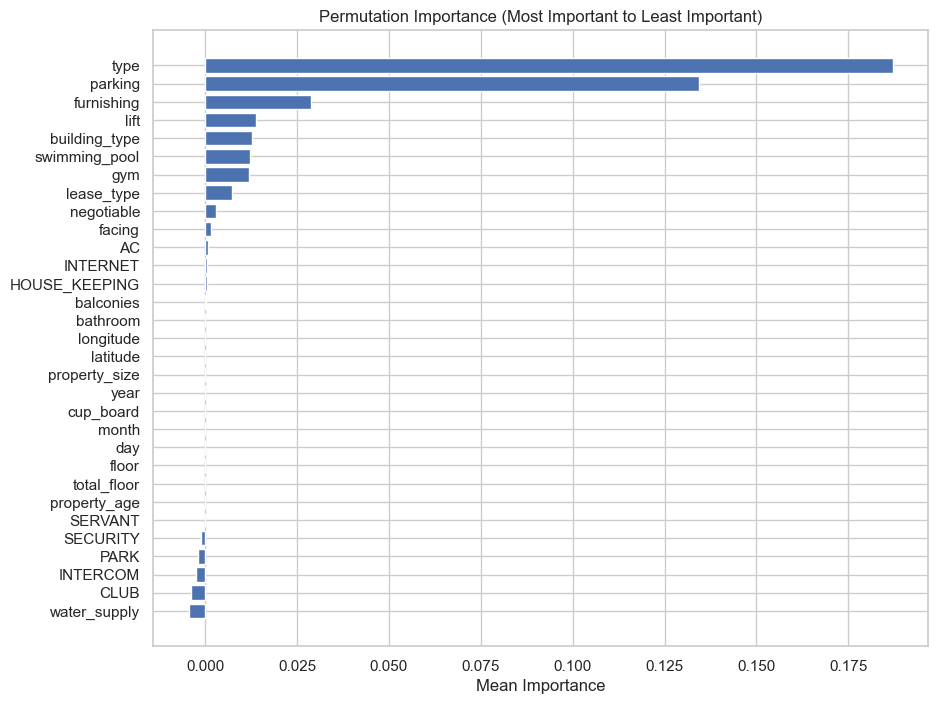

In [175]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Compute permutation importances
result = permutation_importance(best_xgb_regressor, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importance
importance = result.importances_mean

# Sort feature importance in ascending order
sorted_idx = importance.argsort()

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(X.shape[1]), importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Mean Importance')
plt.title('Permutation Importance (Most Important to Least Important)')
plt.show()


# Exporting the model for future use

In [149]:
import pickle

In [176]:
# Save the model to a file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_regressor, file)

# Future Work on the Model

# Feature Enginerring 
Wth respect to  this in futrure we can definetlley add a lot of feature to this by using the latitude and longitude for
Feature Engineering

In the future, we can significantly enhance our dataset through feature engineering. By leveraging the latitude and longitude information of the properties and utilizing the Google Maps Nearby API, we have the opportunity to add numerous features that could provide valuable insights into the rental property market.

Potential features to consider include:

- **Nearby Schools:** Evaluate the proximity of schools to the property, which could impact the desirability for families.

- **Colleges:** Explore the presence of colleges or universities in the vicinity, potentially influencing housing demand for students.

- **Hospitals:** Assess the distance to nearby hospitals, which can be crucial for residents seeking healthcare facilities.

- **Bus Stations:** Analyze the accessibility of public transportation by considering the distance to bus stations.

- **Railway Stations:** Examine the distance to railway stations, which may be essential for commuters.

- **Airport:** Evaluate the proximity to airports, which could affect the property's appeal for frequent travelers.

- **Malls:** Consider the presence of shopping malls in the area, influencing the convenience and lifestyle aspects for residents.

- **Restaurants:** Evaluate the availability of restaurants, which can contribute to the overall dining and entertainment experience.

- **Cafes:** Assess the proximity to cafes, reflecting the social and leisure opportunities in the neighborhood.

By incorporating these additional features, we can gain a more comprehensive understanding of the factors influencing rental prices. This expanded dataset could serve as a foundation for building a predictive model that takes into account not only the property attributes but also the surrounding amenities and infrastructure.

This approach allows us to create a more nuanced and accurate model that reflects the complex dynamics of the real estate market, providing valuable insights for property owners, investors, and renters alike.
